In [7]:
#Parte 1 punto 2a
import pandas as pd
import numpy as np


def cargar_datos():
    try:
        df_2004 = pd.read_stata("usu_individual_T104.dta", convert_categoricals=False)
        df_2024 = pd.read_excel("usu_individual_T124.xlsx")
        return df_2004, df_2024
    except Exception as e:
        print(f"Error al cargar archivos: {str(e)}")
        return None, None

# Filtrar y preparar los datos
def preparar_datos(df_2004, df_2024):
    # Filtrar Neuquén-Plottier
    neuquen_2004 = df_2004[df_2004['aglomerado'] == 17].copy()
    neuquen_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()
    
    # Estandarizar nombres
    neuquen_2024.columns = neuquen_2024.columns.str.lower().str.strip().str.replace(' ', '_')
    
    # Identificar columnas comunes con datos
    columnas_comunes = []
    for col in set(neuquen_2004.columns) & set(neuquen_2024.columns):
        if not (neuquen_2004[col].isna().all() and neuquen_2024[col].isna().all()):
            columnas_comunes.append(col)
    
    # Asegurar compatibilidad de tipos
    for col in columnas_comunes:
        try:
            if neuquen_2004[col].dtype != neuquen_2024[col].dtype:
                neuquen_2024[col] = neuquen_2024[col].astype(neuquen_2004[col].dtype)
        except:
            try:
                neuquen_2004[col] = neuquen_2004[col].astype(neuquen_2024[col].dtype)
            except:
                print(f"No se pudo igualar el tipo para {col}")
                columnas_comunes.remove(col)
    
    # Añadir año 
    neuquen_2004['año'] = 2004
    neuquen_2024['año'] = 2024
    
    if 'trimestre' not in columnas_comunes:
        if 'trimestre' in neuquen_2004.columns:
            columnas_comunes.append('trimestre')
        elif 'trimestre' in neuquen_2024.columns:
            columnas_comunes.append('trimestre')
        else:
            print("Advertencia: No se encontró columna 'trimestre'")
    
    return neuquen_2004, neuquen_2024, columnas_comunes

# Función para guardar en Excel
def guardar_excel(df_2004, df_2024, df_completo, columnas_comunes):
    try:
        with pd.ExcelWriter("EPH_Neuquen_Plottier_2004_2024.xlsx") as writer:
            # Hoja completa
            df_completo.to_excel(writer, sheet_name='Datos Completos', index=False)
            
            # Hoja resumen
            pd.DataFrame({
                'Año': [2004, 2024],
                'Registros': [len(df_2004), len(df_2024)],
                'Columnas': [len(columnas_comunes), len(columnas_comunes)]
            }).to_excel(writer, sheet_name='Resumen', index=False)
            
            # Hojas por año
            df_completo[df_completo['año'] == 2004].to_excel(
                writer, sheet_name='2004', index=False)
            
            df_completo[df_completo['año'] == 2024].to_excel(
                writer, sheet_name='2024', index=False)
        
        print("Archivo Excel creado")
        return True
    except Exception as e:
        print(f"Error al guardar Excel: {str(e)}")
        return False
#Ejecucion 
if __name__ == "__main__":
    # Cargar datos
    df_2004, df_2024 = cargar_datos()
    if df_2004 is None or df_2024 is None:
        exit()
    
    # Preparar datos
    neuquen_2004, neuquen_2024, columnas_comunes = preparar_datos(df_2004, df_2024)
    
    # Concatenar para evitar errores
    datos_completos = pd.concat([
        neuquen_2004[columnas_comunes + ['año']],
        neuquen_2024[columnas_comunes + ['año']]
    ], ignore_index=True, sort=False)
    
    # Guardar
    if guardar_excel(neuquen_2004, neuquen_2024, datos_completos, columnas_comunes):
        print(f"\nRegistros 2004: {len(neuquen_2004)}")
        print(f"Registros 2024: {len(neuquen_2024)}")
        print(f"Total unificado: {len(datos_completos)}")
        print("\nHojas en el archivo:")
        print("1. 'Datos Completos': Todos los datos unificados")
        print("2. 'Resumen': Estadísticas básicas")
        print("3. '2004': Solo datos de 2004")
        print("4. '2024': Solo datos de 2024")
    else:
        
        datos_completos.to_csv("EPH_Neuquen_Plottier_2004_2024.csv", index=False)
        print("Se guardó como CSV alternativo")

Archivo Excel creado

Registros 2004: 779
Registros 2024: 1160
Total unificado: 1939

Hojas en el archivo:
1. 'Datos Completos': Todos los datos unificados
2. 'Resumen': Estadísticas básicas
3. '2004': Solo datos de 2004
4. '2024': Solo datos de 2024


In [8]:
#Parte 1 punto 2b

df_2004_neuquen.columns = df_2004_neuquen.columns.str.upper()
df_2024_neuquen.columns = df_2024_neuquen.columns.str.upper()

# Seleccionar 15 variables clave
variables_interes = [
    'CH04', 'CH06', 'ESTADO', 'NIVEL_ED', 'IPCF', 'PP07H', 
    'PP07I', 'V2_M', 'V5_M', 'V8_M', 'V12_M', 'P21', 'CAT_INAC', 'CH07', 'CH08'
]

# Verificar NA por año
na_2004 = df_2004_neuquen[variables_interes].isna().sum().rename("NA_2004")
na_2024 = df_2024_neuquen[variables_interes].isna().sum().rename("NA_2024")
tabla_na = pd.concat([na_2004, na_2024], axis=1)

# Mostrar tabla
print("VALORES FALTANTES POR AÑO:")
display(tabla_na)


NameError: name 'df_2004_neuquen' is not defined

In [13]:
#Parte 1 punto 2c
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

# Función de Carga y Filtrado
def cargar_y_filtrar_datos():
    """Carga y filtra los datos para Neuquén-Plottier"""
    try:
        # Cargar datos con manejo de tipos explícito
        df_2004 = pd.read_stata("usu_individual_T104.dta", convert_categoricals=False)
        df_2024 = pd.read_excel("usu_individual_T124.xlsx")
        
        # Filtrar Neuquén-Plottier (AGLOMERADO=17)
        df_2004 = df_2004[df_2004['aglomerado'] == 17].copy()
        df_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()
        
        # Estandarizar nombres de columnas y eliminar columnas completamente vacías
        df_2024.columns = df_2024.columns.str.lower()
        df_2004 = df_2004.dropna(axis=1, how='all')
        df_2024 = df_2024.dropna(axis=1, how='all')
        
        return df_2004, df_2024
        
    except Exception as e:
        print(f"Error al cargar datos: {str(e)}")
        return None, None

# Función de Limpieza de Datos
def limpiar_datos_eph(df):
  
    # Manejo de valores faltantes
    df = df.replace({' ': np.nan, '': np.nan, 'NaN': np.nan, 'NA': np.nan})
    
    # Corrección de valores atípicos en ingresos (valores negativos)
    if 'p21' in df.columns:  # Ingreso principal
        df['p21'] = df['p21'].apply(lambda x: np.nan if x < 0 else x)
    
    if 'ipcf' in df.columns:  # Ingreso per cápita familiar
        df['ipcf'] = df['ipcf'].apply(lambda x: np.nan if x < 0 else x)
    
    # Estandarización de variables categóricas importantes
    cat_vars = ['estado', 'cat_ocup', 'nivel_ed', 'ch04']  # Ajustar según tus variables
    for var in cat_vars:
        if var in df.columns:
            df[var] = df[var].astype('category')
    
    return df


def concatenar_dataframes(df1, df2):
    """Concatena dataframes manejando columnas comunes no vacías"""
    # Identificar columnas comunes no vacías
    common_cols = [col for col in df1.columns.intersection(df2.columns)
                  if not (df1[col].isna().all() and df2[col].isna().all())]
    
    # Filtrar y concatenar
    return pd.concat([
        df1[common_cols],
        df2[common_cols]
    ], ignore_index=True)


def exportar_a_excel(df, filename):
    """Exporta el dataframe a Excel con manejo de errores"""
    try:
        df.to_excel(filename, index=False, engine='openpyxl')
        return True
    except Exception as e:
        print(f"Error al exportar a Excel: {str(e)}")
        return False

# Ejecución 
if __name__ == "__main__":
    print("PROCESO DE LIMPIEZA EPH - NEUQUÉN-PLOTTIER")
    
    # Cargar y filtrar datos
    df_2004, df_2024 = cargar_y_filtrar_datos()
    if df_2004 is None or df_2024 is None:
        exit()
    
    # Limpiar datos
    df_2004_clean = limpiar_datos_eph(df_2004)
    df_2024_clean = limpiar_datos_eph(df_2024)
    
    # Unificar
    df_2004_clean['año'] = 2004
    df_2024_clean['año'] = 2024
    df_final = concatenar_dataframes(df_2004_clean, df_2024_clean)
    
    # Exportar
    if not exportar_a_excel(df_final, "EPH_Neuquen_Plottier_Limpio.xlsx"):
        df_final.to_csv("EPH_Neuquen_Plottier_Limpio.csv", index=False, encoding='utf-8-sig')
        print("Se guardó como CSV alternativo")
    
    # Resumen
    print("\nRESULTADOS")
    print(f"Registros 2004: {len(df_2004_clean)}")
    print(f"Registros 2024: {len(df_2024_clean)}")
    print(f"Total registros: {len(df_final)}")
    print(f"Columnas en el archivo final: {len(df_final.columns)}")


PROCESO DE LIMPIEZA EPH - NEUQUÉN-PLOTTIER


C:\Users\Fran\AppData\Local\Temp\ipykernel_36284\36504431.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({' ': np.nan, '': np.nan, 'NaN': np.nan, 'NA': np.nan})



RESULTADOS
Registros 2004: 779
Registros 2024: 1160
Total registros: 1939
Columnas en el archivo final: 167


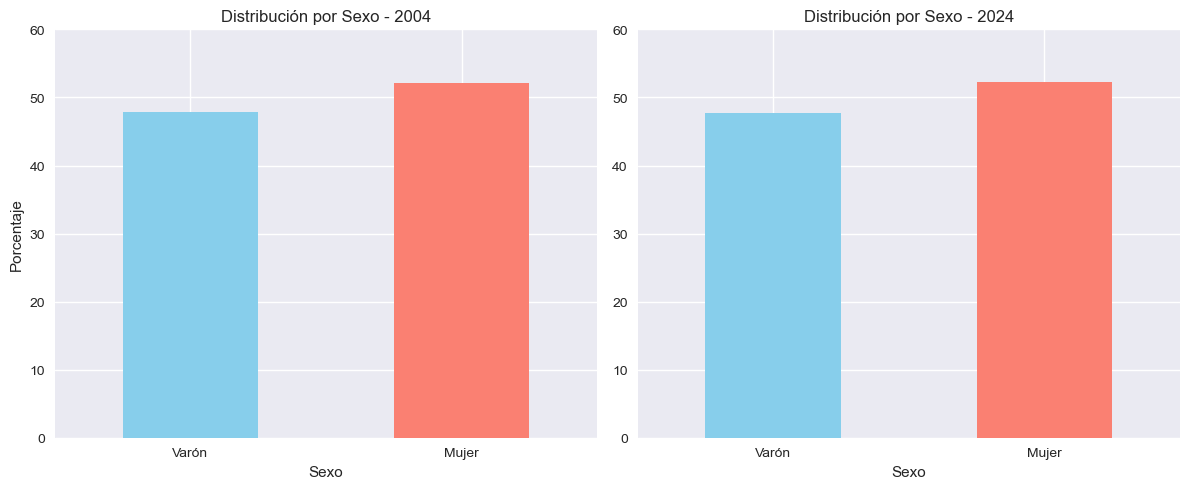

In [40]:
#Parte 2 punto 3
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8')  
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Datos 2004
sexo_2004 = df_2004_clean['ch04'].value_counts(normalize=True).sort_index() * 100
sexo_2004.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Distribución por Sexo - 2004')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Porcentaje')
axes[0].set_xticklabels(['Varón', 'Mujer'], rotation=0)
axes[0].set_ylim(0, 60)

# Datos 2024
sexo_2024 = df_2024_clean['ch04'].value_counts(normalize=True).sort_index() * 100
sexo_2024.plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Distribución por Sexo - 2024')
axes[1].set_xlabel('Sexo')
axes[1].set_xticklabels(['Varón', 'Mujer'], rotation=0)
axes[1].set_ylim(0, 60)

plt.tight_layout()
plt.savefig('composicion_sexo.png', dpi=300)
plt.show()

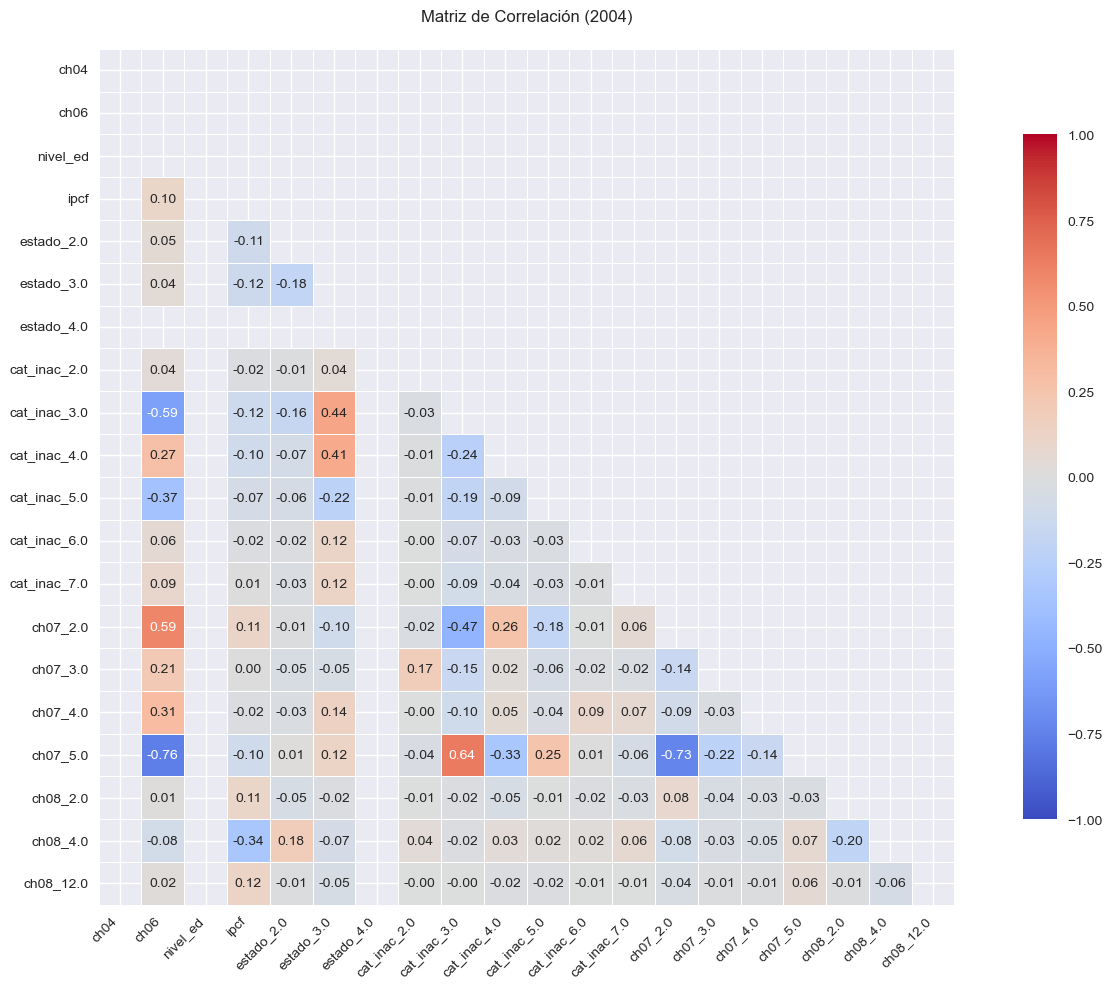

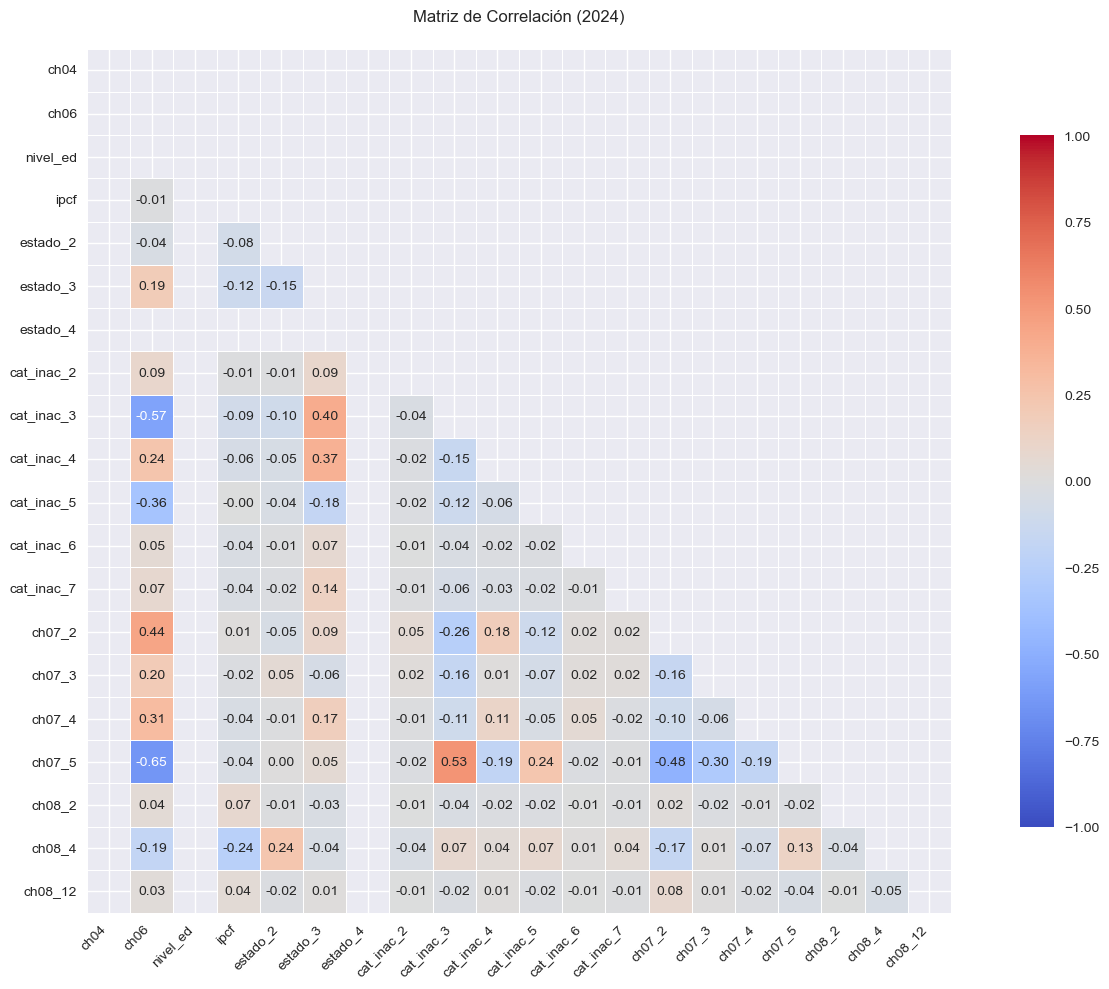

In [54]:
#Parte 2 punto 4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Lista de variables originales
vars_corr = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Codificamos variables categóricas
def encode_categorical(df):
    df_encoded = df.copy()
    
    df_encoded['ch04'] = df_encoded['ch04'].map({'Varón': 0, 'Mujer': 1})
    
  
    if 'nivel_ed' in df_encoded.columns:
        df_encoded['nivel_ed'] = df_encoded['nivel_ed'].map({
            'Primaria': 1,
            'Secundaria': 2,
            'Universidad': 3
        })
    
    # Otras variables categóricas 
    categorical_vars = ['estado', 'cat_inac', 'ch07', 'ch08'] 
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_vars, drop_first=True)
    
    return df_encoded

# Aplicar a ambos años
df_2004_encoded = encode_categorical(df_2004_clean)
df_2024_encoded = encode_categorical(df_2024_clean)

# Columnas numericas relevantes
def get_numeric_vars(df, original_vars):
    # Selecciona columnas que empiezan con los nombres originales (incluye dummies)
    all_columns = df.columns
    selected_columns = [col for col in all_columns 
                       if any(col.startswith(var) for var in original_vars)]
    return df[selected_columns]

# Grafico
def plot_correlation_heatmap(df, year, figsize=(14, 10)):
    plt.figure(figsize=figsize)
    corr = df.corr()
    
    # Máscara para ocultar la diagonal superior para leer con mas facilidad
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(
        corr, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        center=0, 
        vmin=-1, 
        vmax=1, 
        mask=mask,
        square=True, 
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    plt.title(f'Matriz de Correlación ({year})', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'correlacion_completa_{year}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Aplicar a 2004 y 2024
plot_correlation_heatmap(get_numeric_vars(df_2004_encoded, vars_corr), '2004')
plot_correlation_heatmap(get_numeric_vars(df_2024_encoded, vars_corr), '2024')

In [9]:
# Parte 3

# Estandarizamos nombres de columnas críticas

columnas_comunes = ['AGLOMERADO', 'CH04', 'CH06', 'ESTADO', 'P21', 'IPCF']

# Renombrar columnas en 2004 para que coincidan con 2024
df_2004 = df_2004.rename(columns={
    'aglomerado': 'AGLOMERADO',
    'ch04': 'CH04',
    'ch06': 'CH06',
    'estado': 'ESTADO',
    'p21': 'P21',
    'ipcf': 'IPCF'
})

# Filtrar solo Neuquén-Plottier (AGLOMERADO=17)
neuquen_2004 = df_2004[df_2004['AGLOMERADO'] == 17].copy()
neuquen_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()

# Verificar que tenemos datos en ambos años
print("\nRegistros 2004:", len(neuquen_2004))
print("Registros 2024:", len(neuquen_2024))

# Agregar columna de año
neuquen_2004['ANIO'] = 2004
neuquen_2024['ANIO'] = 2024

# Combinar ambos años asegurando las mismas columnas
common_cols = list(set(neuquen_2004.columns) & set(neuquen_2024.columns))
neuquen_total = pd.concat([
    neuquen_2004[common_cols],
    neuquen_2024[common_cols]
], ignore_index=True)

# Verificar que tenemos ambos años en los datos combinados
print("\nAños en datos combinados:", neuquen_total['ANIO'].unique())

# Análisis por estado de actividad (versión corregida)
print("\nRESULTADOS POR ESTADO DE ACTIVIDAD")

# Filtrar solo quienes respondieron sobre actividad
con_respuesta = neuquen_total[neuquen_total['ESTADO'] != 0].copy()

# Crear variable PEA (Población Económicamente Activa)
con_respuesta['PEA'] = con_respuesta['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)

# Calcular estadísticas por año
stats = con_respuesta.groupby(['ANIO', 'ESTADO']).agg(
    Cantidad=('ESTADO', 'count'),
    IPCF_Promedio=('IPCF', 'mean')
).reset_index()

# Mapear códigos de estado a etiquetas
mapeo_estados = {
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Inactivo'
}
stats['ESTADO'] = stats['ESTADO'].map(mapeo_estados)
stats['IPCF_Promedio'] = stats['IPCF_Promedio'].round(2)

print("\nEstadísticas por estado de actividad:")
print(stats.to_string(index=False))

# Resumen por año
resumen = con_respuesta.groupby('ANIO')['ESTADO'].value_counts().unstack()
resumen = resumen.rename(columns=mapeo_estados)

print("\nCantidad de personas por estado:")
print(resumen)

# Manejo de no respuesta
print("\n" + "="*50)
print("ANÁLISIS DE NO RESPUESTA")
print("="*50)

# Separar en respondieron/norespondieron
norespondieron = neuquen_total[neuquen_total['ESTADO'] == 0]
respondieron = neuquen_total[neuquen_total['ESTADO'] != 0]

# Estadísticas de no respuesta
no_respuesta_stats = norespondieron.groupby('ANIO').size()
print("\nPersonas que NO respondieron sobre su condición de actividad:")
print(no_respuesta_stats)

# Porcentaje de no respuesta
total_por_anio = neuquen_total.groupby('ANIO').size()
porcentaje_no_respuesta = (no_respuesta_stats / total_por_anio * 100).round(2)

print("\nPorcentaje de no respuesta:")
print(porcentaje_no_respuesta)



Registros 2004: 779
Registros 2024: 1160

Años en datos combinados: [2004 2024]

RESULTADOS POR ESTADO DE ACTIVIDAD

Estadísticas por estado de actividad:
 ANIO     ESTADO  Cantidad  IPCF_Promedio
 2004    Ocupado       297         431.67
 2004 Desocupado        36         151.85
 2004   Inactivo       315         270.78
 2004        NaN       131         246.57
 2024    Ocupado       559      253504.57
 2024 Desocupado        40       83831.25
 2024   Inactivo       437      159883.30
 2024        NaN       124      159938.84

Cantidad de personas por estado:
ESTADO  Ocupado  Desocupado  Inactivo  4.0
ANIO                                      
2004        297          36       315  131
2024        559          40       437  124

ANÁLISIS DE NO RESPUESTA

Personas que NO respondieron sobre su condición de actividad:
Series([], dtype: int64)

Porcentaje de no respuesta:
ANIO
2004   NaN
2024   NaN
dtype: float64



Columnas 2004: ['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08

<Figure size 1000x600 with 0 Axes>

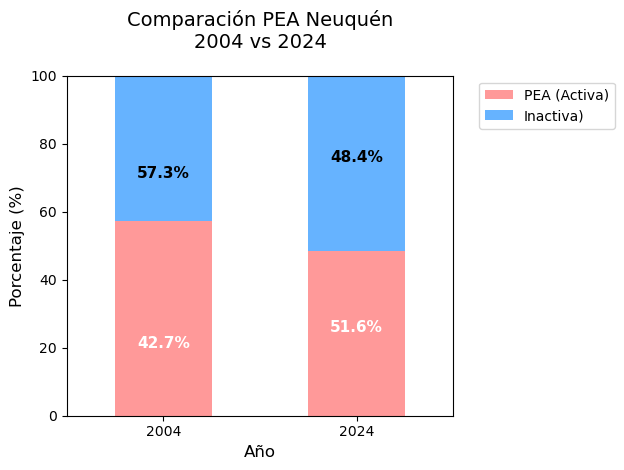


Datos guardados en 'respondieron_neuquen.csv'
Gráfico guardado como 'pea_comparacion.png'


In [122]:
#Punto 6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_2004 = pd.read_stata("usu_individual_T104.dta", convert_categoricals=False)
df_2024 = pd.read_excel("usu_individual_T124.xlsx")

# Verificar estructura de los datos
print("\nColumnas 2004:", df_2004.columns.tolist())
print("Columnas 2024:", df_2024.columns.tolist())

# Estandarizar nombres de columnas críticas
df_2004 = df_2004.rename(columns={
    'aglomerado': 'AGLOMERADO',
    'estado': 'ESTADO',
    'p21': 'P21',
    'ipcf': 'IPCF',
    'ch04': 'CH04',
    'ch06': 'CH06',
    'ch12': 'CH12',
    'ch13': 'CH13',
    'ch14': 'CH14',
    'cat_ocup': 'CAT_OCUP',
    'ocup_2': 'OCUP_2',
    'ocup_3': 'OCUP_3',
    'tamano_2': 'TAMANO_2',
    'tamano_3': 'TAMANO_3',
    'ppo7h': 'PP07H'
    
    
})

# Filtrar Neuquén 
neuquen_2004 = df_2004[df_2004['AGLOMERADO'] == 17].copy()
neuquen_2024 = df_2024[df_2024['AGLOMERADO'] == 17].copy()


print("\nRegistros 2004:", len(neuquen_2004))
print("Registros 2024:", len(neuquen_2024))


neuquen_2004['ANIO'] = 2004
neuquen_2024['ANIO'] = 2024


common_cols = list(set(neuquen_2004.columns) & set(neuquen_2024.columns))
neuquen_total = pd.concat([
    neuquen_2004[common_cols],
    neuquen_2024[common_cols]
], ignore_index=True)


respondieron = neuquen_total[neuquen_total['ESTADO'] != 0].copy()
respondieron['PEA'] = respondieron['ESTADO'].apply(lambda x: 1 if x in [1, 2] else 0)


pea_composicion = respondieron.groupby(['ANIO', 'PEA']).size().unstack(fill_value=0)
pea_composicion = pea_composicion.div(pea_composicion.sum(axis=1), axis=0) * 100
pea_composicion.columns = ['Inactiva', 'Activa']


all_years = [2004, 2024]
pea_composicion = pea_composicion.reindex(all_years, fill_value=0)

print("\nCOMPOSICIÓN PEA NEUQUÉN (2004 y 2024)")
print(pea_composicion.round(1))

# Gráfico comparativo
plt.figure(figsize=(10, 6))
ax = pea_composicion.plot(kind='bar',
                         stacked=True,
                         color=['#ff9999', '#66b3ff'],
                         width=0.5)

plt.title('Comparación PEA Neuquén\n2004 vs 2024', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)


for i, year in enumerate(pea_composicion.index):
    if year in pea_composicion.index:
        activa = pea_composicion.loc[year, 'Activa']
        inactiva = pea_composicion.loc[year, 'Inactiva']
        plt.text(i, activa/2, f"{activa:.1f}%", ha='center', va='center', 
                fontsize=11, color='white', fontweight='bold')
        plt.text(i, activa + inactiva/2, f"{inactiva:.1f}%", ha='center', 
                va='center', fontsize=11, fontweight='bold')

plt.legend(['PEA (Activa)', 'Inactiva)'], bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('pea_comparacion.png', dpi=300, bbox_inches='tight')
plt.show()

# Guardar datos
respondieron.to_csv('respondieron_neuquen.csv', index=False)
print("\nDatos guardados en 'respondieron_neuquen.csv'")
print("Gráfico guardado como 'pea_comparacion.png'")


COMPARACIÓN PEA vs PET - NEUQUÉN
      Porcentaje_PEA  Porcentaje_PET  Tasa_Actividad
ANIO                                                
2004            42.7            68.8            62.1
2024            51.6            68.3            75.6


<Figure size 1200x600 with 0 Axes>

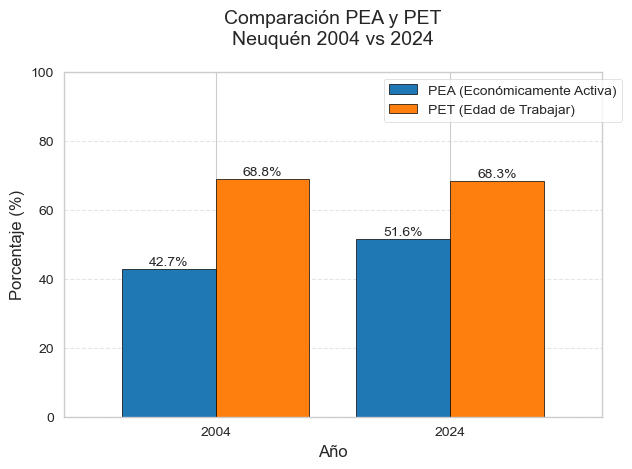

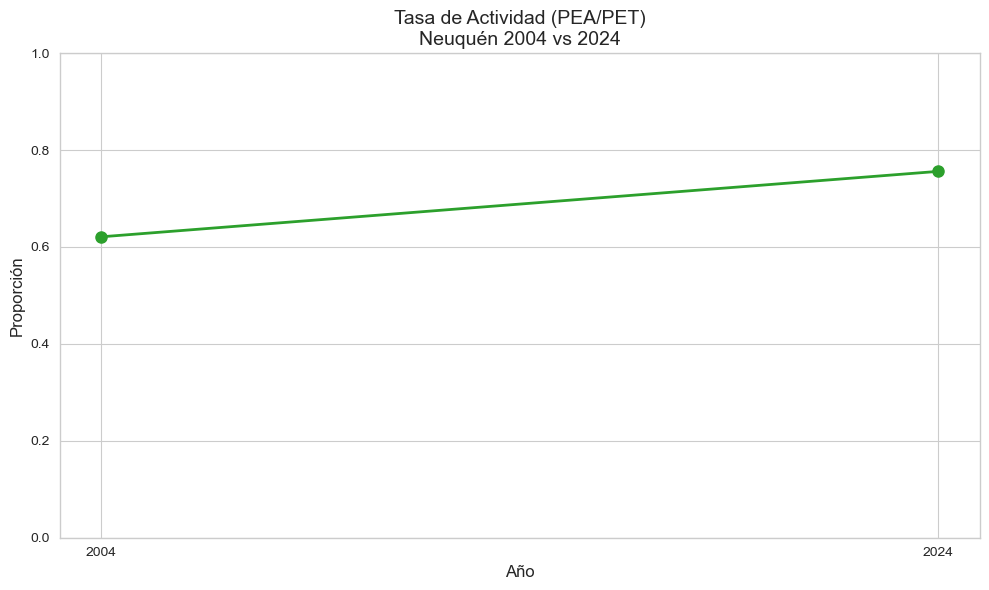

In [32]:
#Punto 7 y 8

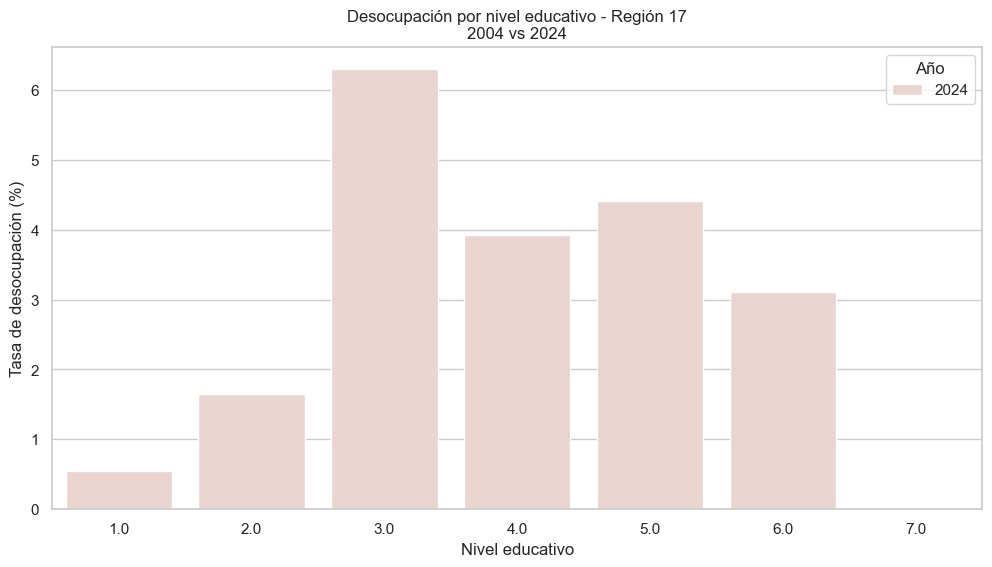

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos 
data_2004 = pd.read_stata('usu_individual_T104.dta', convert_categoricals=False)
data_2024 = pd.read_excel('usu_individual_T124.xlsx')

# Seleccionar región 
region_seleccionada = 17 

# Filtrar por región y unificar
data_2004 = data_2004[data_2004['aglomerado'] == region_seleccionada].copy()
data_2024 = data_2024[data_2024['AGLOMERADO'] == region_seleccionada].copy()

# Agregar año y resetear índices para evitar duplicados
data_2004['ANO'] = 2004
data_2024['ANO'] = 2024

# Resetear índices antes de concatenar
data_2004.reset_index(drop=True, inplace=True)
data_2024.reset_index(drop=True, inplace=True)

# Unir los datos asegurando índices únicos
data_completa = pd.concat([data_2004, data_2024], ignore_index=True)

# Crear base respondenta
respondenta = data_completa[data_completa['ESTADO'] != 0].copy()
respondenta.reset_index(drop=True, inplace=True)  # Resetear índice nuevamente

# Crear variable desocupado (1=desocupado, 0=otro)
respondenta['desocupado'] = (respondenta['ESTADO'] == 2).astype(int)

# Configuración estética para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 9a. Gráfico de desocupación por nivel educativo
# Primero verificar que la variable NIVEL_ED existe
if 'NIVEL_ED' in respondenta.columns:
    plt.figure()
    # Agrupar y calcular porcentajes manualmente para evitar el error
    grouped = respondenta.groupby(['ANO', 'NIVEL_ED'])['desocupado'].mean().reset_index()
    grouped['porcentaje'] = grouped['desocupado'] * 100
    
    ax = sns.barplot(
        data=grouped,
        x='NIVEL_ED',
        y='porcentaje',
        hue='ANO',
        errorbar=None
    )
    plt.title(f'Desocupación por nivel educativo - Región {region_seleccionada}\n2004 vs 2024')
    plt.ylabel('Tasa de desocupación (%)')
    plt.xlabel('Nivel educativo')
    plt.legend(title='Año')
    plt.show()
else:
    print("Advertencia: La columna 'NIVEL_ED' no existe en los datos")


C:\Users\Fran\AppData\Local\Temp\ipykernel_36212\205786886.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = respondenta.groupby(['ANO', 'grupo_edad'])['desocupado'].mean().reset_index()


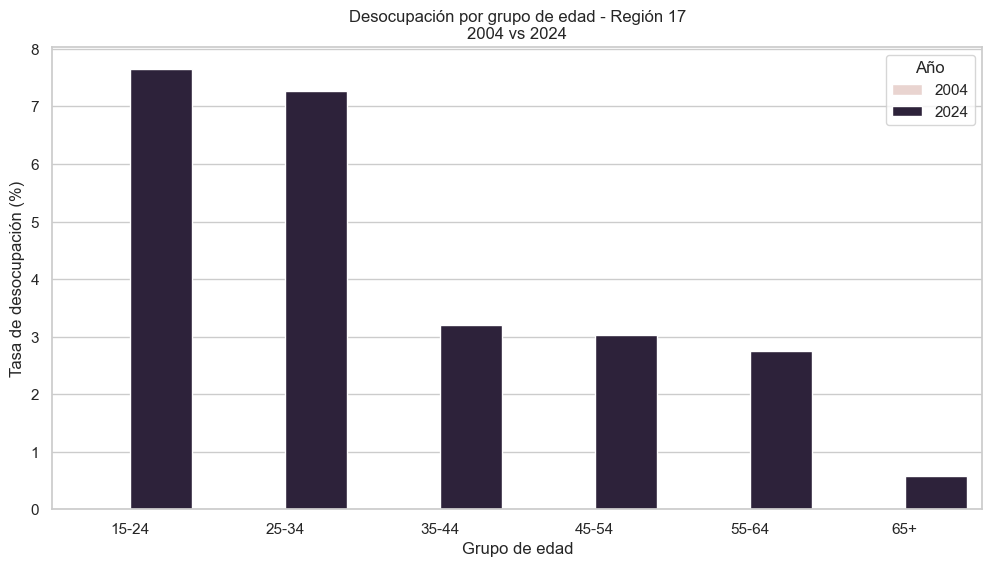

In [17]:
# 9b. Gráfico de desocupación por grupos de edad
if 'CH06' in respondenta.columns:
    respondenta['grupo_edad'] = pd.cut(
        respondenta['CH06'],
        bins=[15, 25, 35, 45, 55, 65, 99],
        labels=['15-24', '25-34', '35-44', '45-54', '55-64', '65+'],
        right=False
    )
    
    # Agrupar manualmente
    grouped_age = respondenta.groupby(['ANO', 'grupo_edad'])['desocupado'].mean().reset_index()
    grouped_age['porcentaje'] = grouped_age['desocupado'] * 100
    
    plt.figure()
    ax = sns.barplot(
        data=grouped_age,
        x='grupo_edad',
        y='porcentaje',
        hue='ANO',
        errorbar=None
    )
    plt.title(f'Desocupación por grupo de edad - Región {region_seleccionada}\n2004 vs 2024')
    plt.ylabel('Tasa de desocupación (%)')
    plt.xlabel('Grupo de edad')
    plt.legend(title='Año')
    plt.show()
    

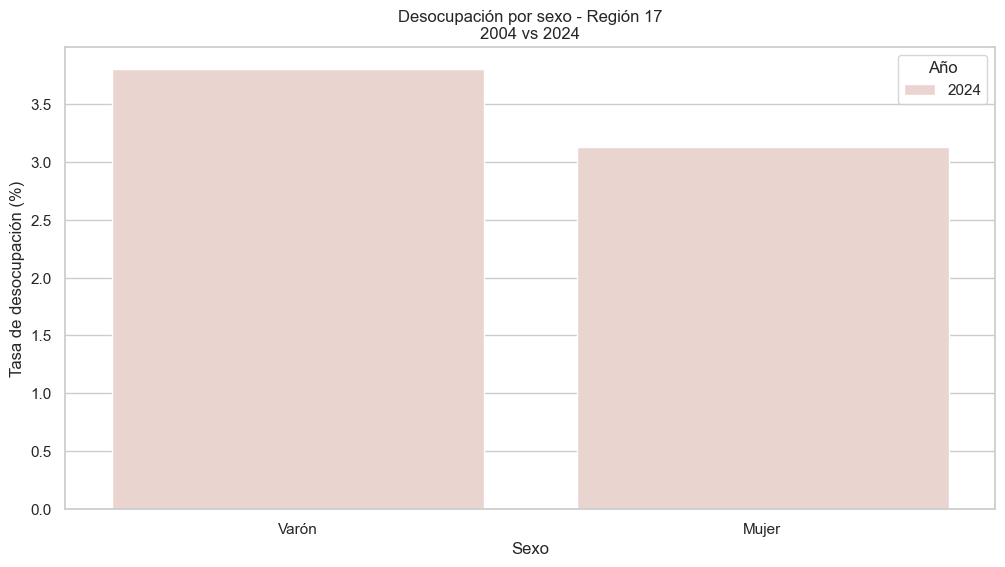


RESULTADOS NUMÉRICOS:
Total respondieron condición de actividad: 1939
Desocupados en 2004: 0
Desocupados en 2024: 40


In [15]:
# 9c. Gráfico de desocupación por sexo
if 'CH04' in respondenta.columns:
    grouped_sex = respondenta.groupby(['ANO', 'CH04'])['desocupado'].mean().reset_index()
    grouped_sex['porcentaje'] = grouped_sex['desocupado'] * 100
    
    plt.figure()
    ax = sns.barplot(
        data=grouped_sex,
        x='CH04',
        y='porcentaje',
        hue='ANO',
        errorbar=None
    )
    plt.title(f'Desocupación por sexo - Región {region_seleccionada}\n2004 vs 2024')
    plt.ylabel('Tasa de desocupación (%)')
    plt.xlabel('Sexo')
    plt.xticks([0, 1], ['Varón', 'Mujer'])
    plt.legend(title='Año')
    plt.show()

# Resultados numéricos
print("\nRESULTADOS NUMÉRICOS:")
print(f"Total respondieron condición de actividad: {len(respondenta)}")
print(f"Desocupados en 2004: {respondenta[(respondenta['ANO'] == 2004) & (respondenta['desocupado'] == 1)].shape[0]}")
print(f"Desocupados en 2024: {respondenta[(respondenta['ANO'] == 2024) & (respondenta['desocupado'] == 1)].shape[0]}")

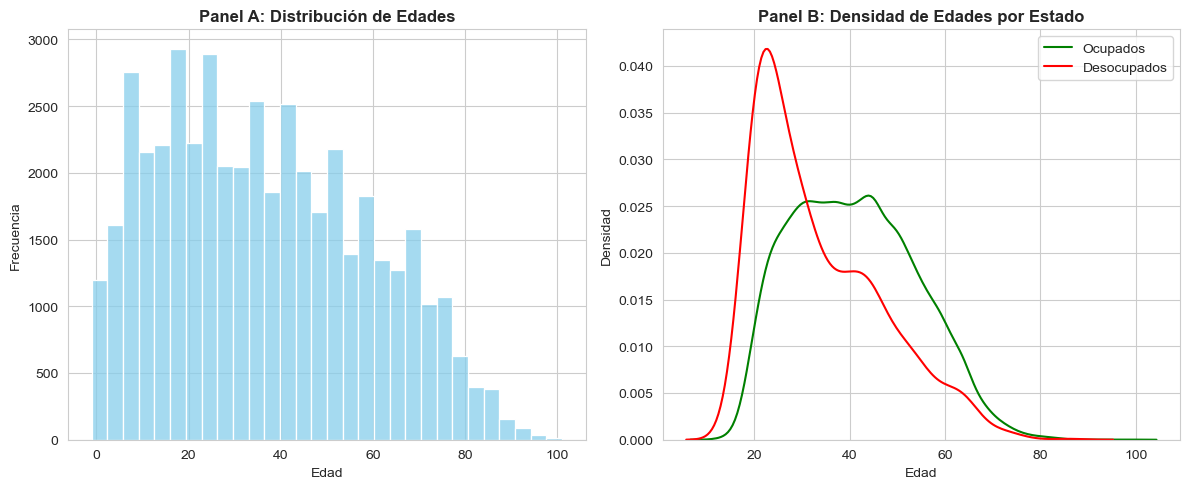

<Figure size 640x480 with 0 Axes>

In [1]:
# Inicio del TP 3
# Parte 1 punto 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
df_2004 = pd.read_stata('usu_individual_T104.dta')  
df_2024 = pd.read_excel('usu_individual_T124.xlsx')  

# Unificamos ambos datasets
df = pd.concat([df_2004, df_2024], ignore_index=True)

# Creamos variable edad2
df = df.assign(edad2=df['CH06']**2)

# Estilo de los gráficos
sns.set_style("whitegrid")  # Usamos el estilo de Seaborn directamente
plt.figure(figsize=(12, 5))

# Primer panel: Histograma de edad
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='CH06', bins=30, kde=False, color='skyblue')
plt.title('Panel A: Distribución de Edades', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Segundo panel: Kernel para ocupados y desocupados
plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['ESTADO'] == 1], x='CH06', label='Ocupados', color='green')
sns.kdeplot(data=df[df['ESTADO'] == 2], x='CH06', label='Desocupados', color='red')
plt.title('Panel B: Densidad de Edades por Estado', fontweight='bold')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

# Guardamos el gráfico

plt.savefig('Cuadro_Punto1.png', bbox_inches='tight', dpi=300)

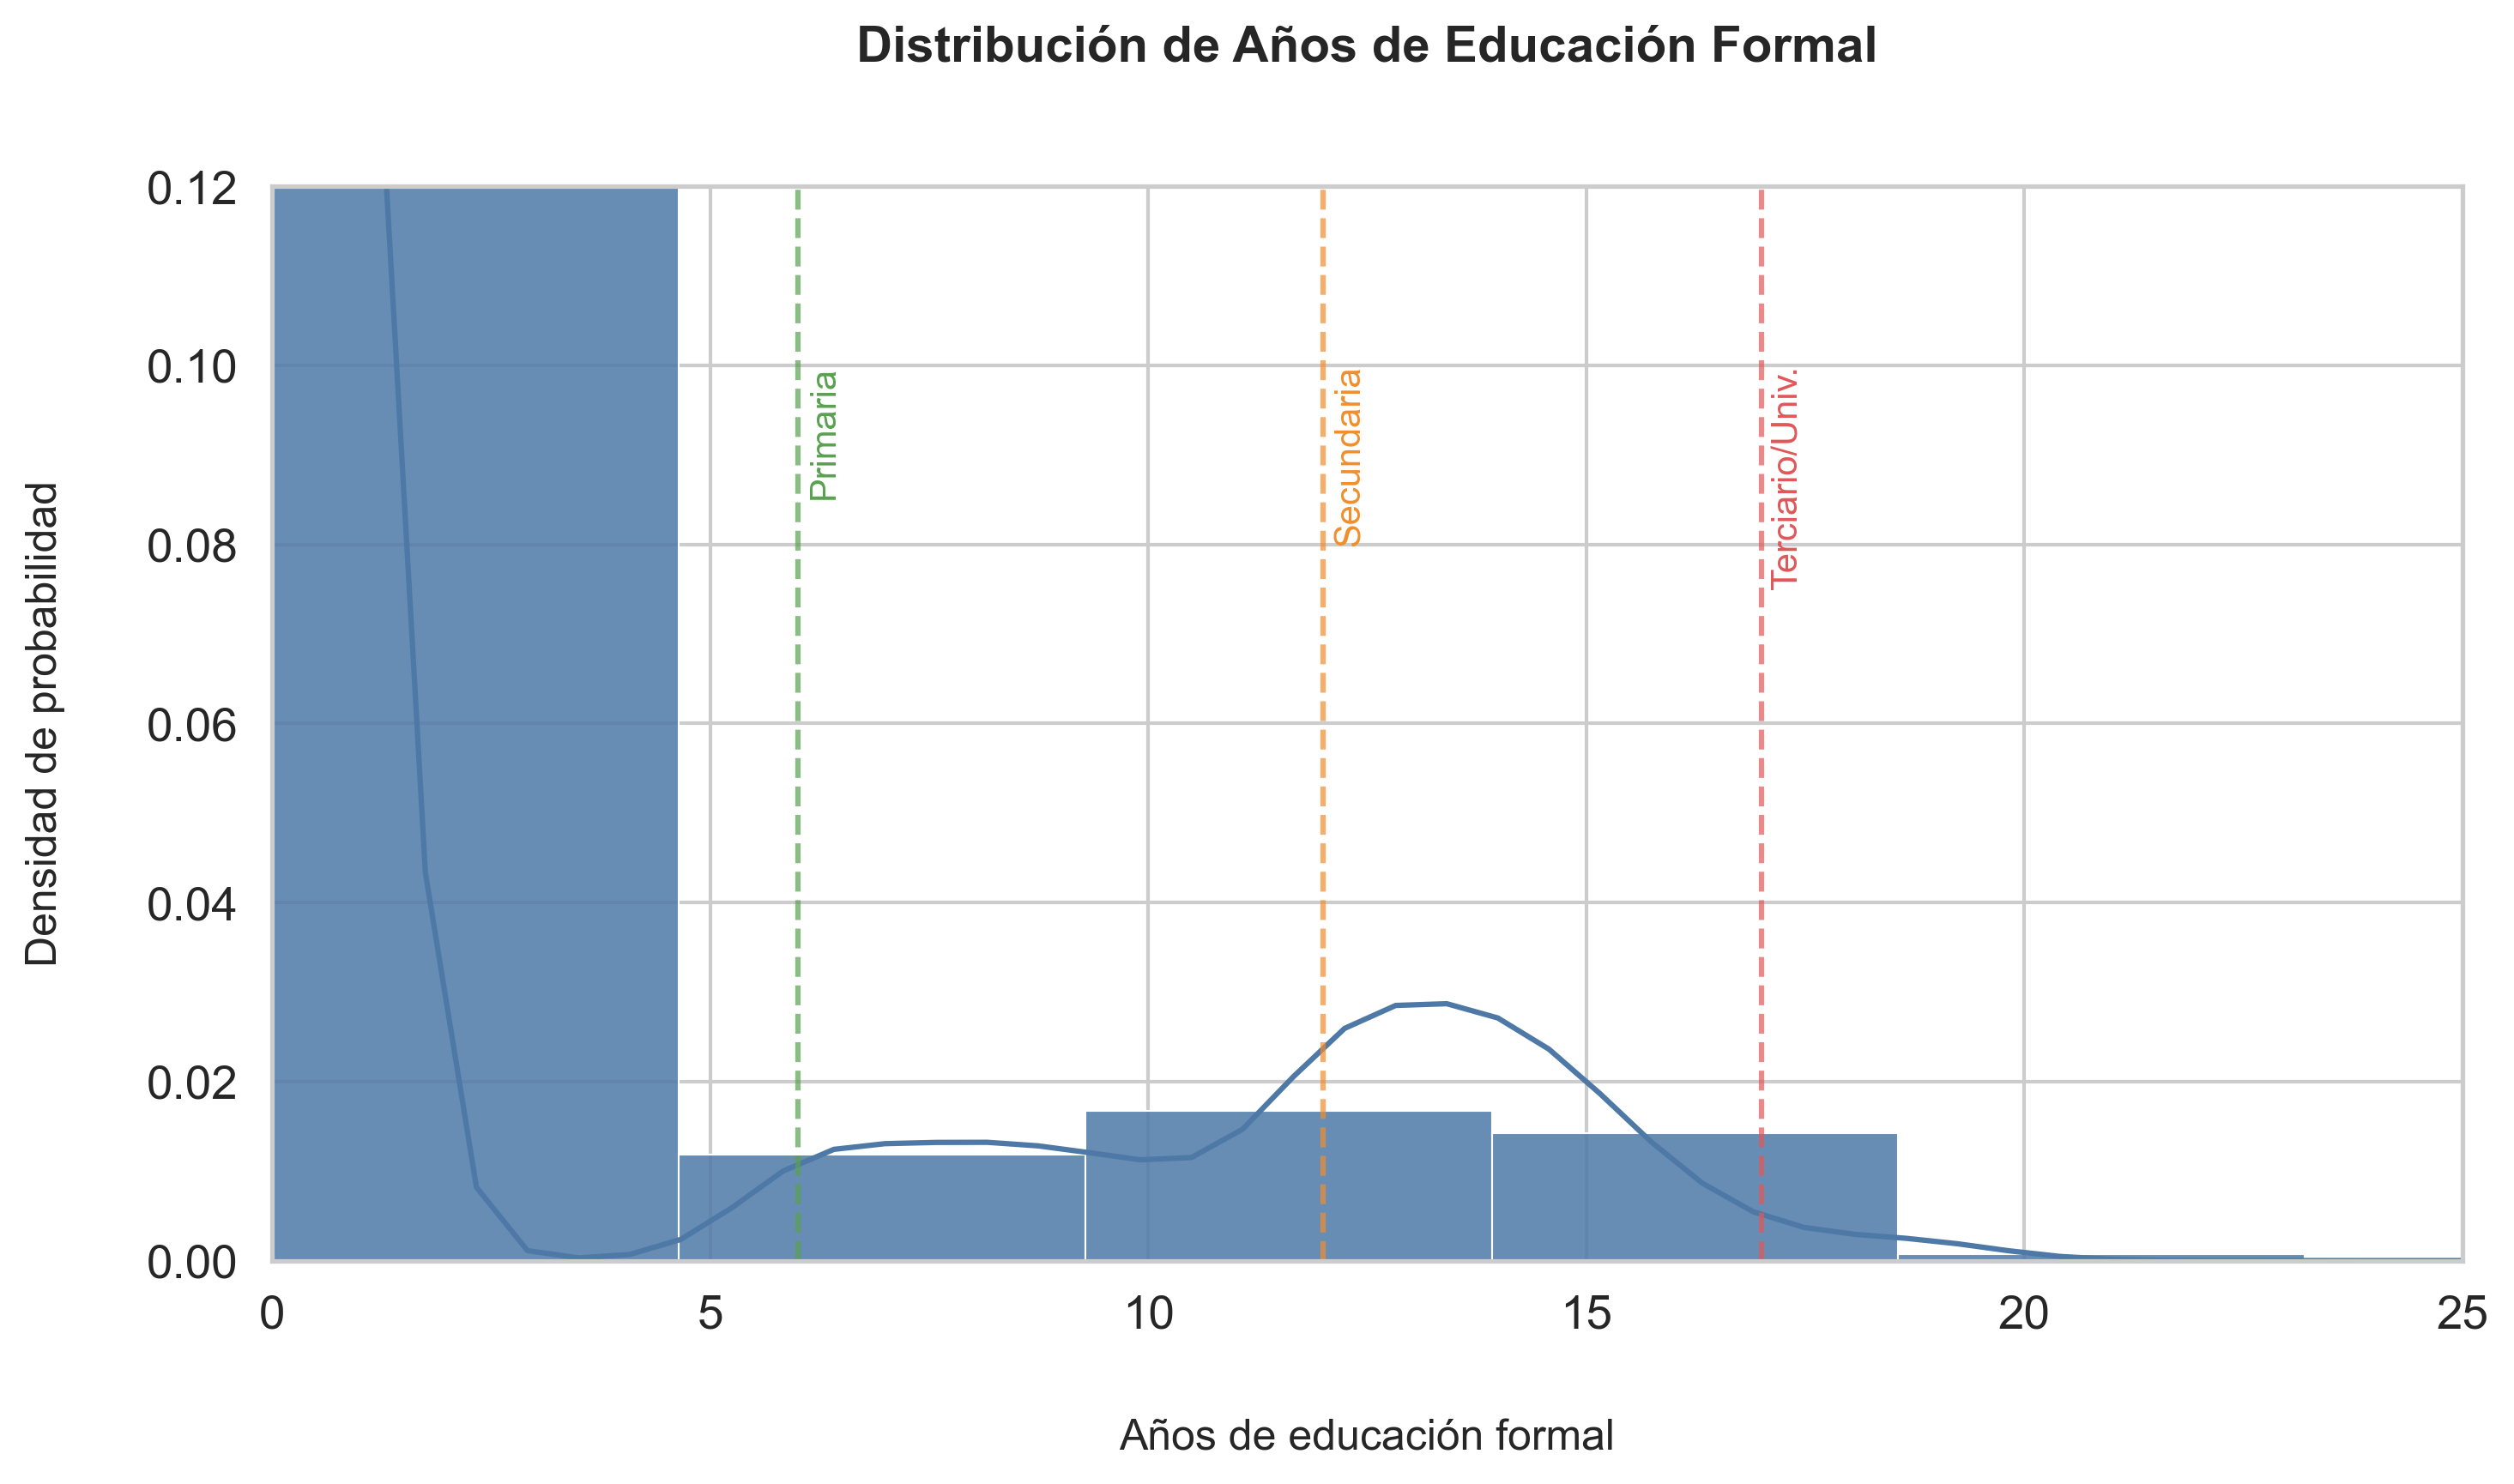

In [3]:
# Punto 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración 
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'

def calcular_años_educacion(row):
    """
    Calcula años de educación basado en:
    - CH12: Nivel educativo más alto
    - CH13: Si completó el nivel
    - CH14: Año aprobado
    """
    nivel = row['CH12']
    completo = row['CH13']
    año = row['CH14']
    
    if nivel == 1: return año if completo == 1 else max(0, año-1)
    elif nivel == 2: return 6 + (año if completo == 1 else max(0, año-1))
    elif nivel in [3,4]: return 12 + (año if completo == 1 else max(0, año-1))
    elif nivel == 5: return 17 + año
    else: return 0

try:
    # Calcular variable educativa
    df['educ'] = df.apply(calcular_años_educacion, axis=1)
    
    # Gráfico profesional de distribución
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df, x='educ', bins=25, kde=True,
                     color='#4e79a7', edgecolor='white', linewidth=0.5,
                     alpha=0.85, stat='density')
    
    # Límites y formato
    plt.xlim(0, 25)
    plt.ylim(0, 0.12)  # Ajustar según tus datos
    
    # Marcadores educativos
    niveles = [
        ('Primaria', 6, '#59a14f'),
        ('Secundaria', 12, '#f28e2b'), 
        ('Terciario/Univ.', 17, '#e15759')
    ]
    
    for nombre, pos, color in niveles:
        plt.axvline(pos, color=color, linestyle='--', alpha=0.7, linewidth=1.5)
        plt.text(pos+0.3, 0.10, nombre, rotation=90, 
                color=color, fontsize=10, va='top', ha='center')
    
    # Títulos y etiquetas
    plt.title('Distribución de Años de Educación Formal\n', 
             fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('\nAños de educación formal', fontsize=12, labelpad=10)
    plt.ylabel('Densidad de probabilidad\n', fontsize=12, labelpad=10)
    
    # Guardar en alta calidad
    plt.tight_layout()
    plt.savefig('Figura2_DistribucionEducacion.png', 
               bbox_inches='tight', dpi=300, facecolor='white')
    
    # 3. Exportar estadísticas
    df['educ'].describe().to_excel('Estadisticas_Educacion.xlsx')
    
except Exception as e:
    print(f"Error: {str(e)}")

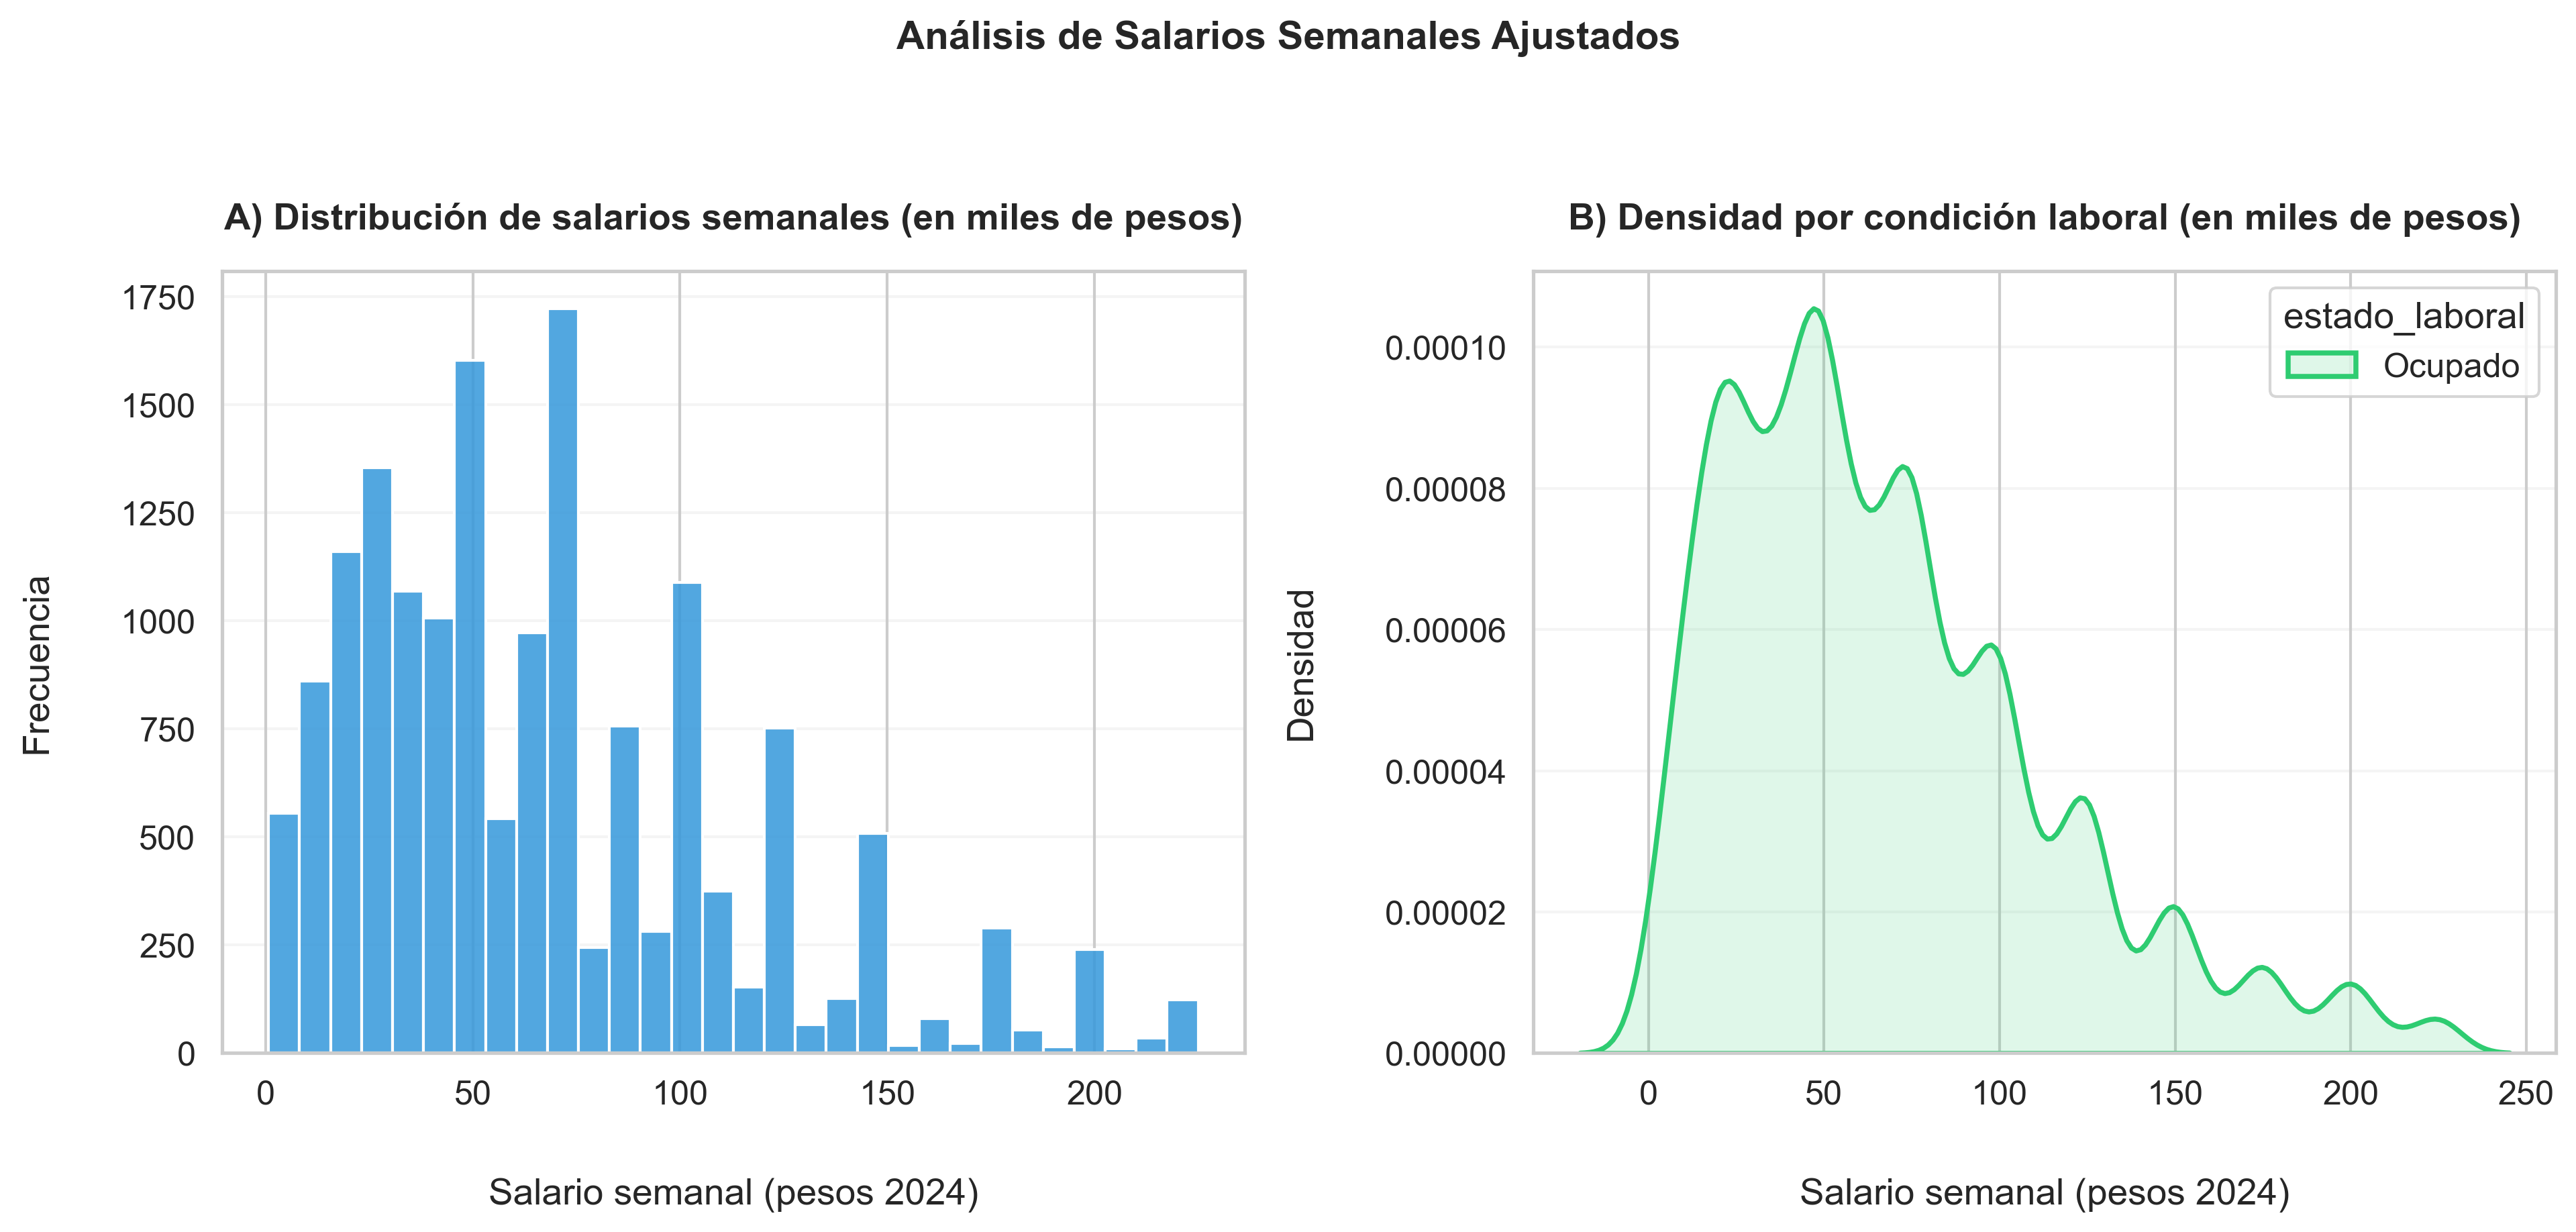

In [41]:
#Punto 3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'

def convertir_a_pesos_2024(valor, año_original):
    """Versión robusta de conversión monetaria"""
    try:
        factores = {2004: 12.5, 2024: 1.0}  
        return valor * factores.get(int(año_original), 1.0)
    except:
        return np.nan

try:
    # Creamos variable de salario semanal con validación
    df['salario_semanal'] = df.apply(
        lambda x: convertir_a_pesos_2024(x['P21'], x['ANO4']) / 40 if pd.notna(x['P21']) else np.nan,
        axis=1
    ).replace([np.inf, -np.inf], np.nan).dropna()
    
    # Filtramos valores extremos y NA
    df_filtrado = df[
        (df['salario_semanal'] <= df['salario_semanal'].quantile(0.99)) & 
        (df['salario_semanal'] > 0) &
        (df['estado_laboral'].isin(['Ocupado', 'Desocupado']))
    ].copy()
    
    # Gráficos de salarios
    plt.figure(figsize=(13, 6))
    
    # Primer panel, Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_filtrado, x='salario_semanal', bins=30,
                color='#3498db', edgecolor='white', alpha=0.85)
    plt.title('A) Distribución de salarios semanales (en miles de pesos)', pad=15, fontweight='semibold')
    plt.xlabel('\nSalario semanal (pesos 2024)', labelpad=10)
    plt.ylabel('Frecuencia\n', labelpad=10)
    plt.grid(axis='y', alpha=0.2)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/100)}'))

    
    # Segundo panel, densidad por estado laboral 
    plt.subplot(1, 2, 2)
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/100)}'))
    
    # Verificar datos para graficar
    if df_filtrado['salario_semanal'].var() > 0:
        ax = sns.kdeplot(data=df_filtrado, x='salario_semanal', hue='estado_laboral',
                        palette={'Ocupado':'#2ecc71', 'Desocupado':'#e74c3c'},
                        fill=True, alpha=0.15, linewidth=1.8, warn_singular=False)
        
        
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            plt.legend(handles=handles, title='Condición laboral', 
                      frameon=True, framealpha=0.9)
    else:
        plt.text(0.5, 0.5, 'Datos insuficientes\npara densidad', 
                ha='center', va='center', fontsize=12)
    
    plt.title('B) Densidad por condición laboral (en miles de pesos)', pad=15, fontweight='semibold')
    plt.xlabel('\nSalario semanal (pesos 2024)', labelpad=10)
    plt.ylabel('Densidad\n', labelpad=10)
    plt.grid(axis='y', alpha=0.2)
    
    # Título general y guardado
    plt.suptitle('Análisis de Salarios Semanales Ajustados\n', 
                fontweight='bold', y=1.02, fontsize=14)
    plt.tight_layout()
    plt.savefig('Figura3_SalariosSemanales.png', 
               bbox_inches='tight', dpi=300, facecolor='white')
    
    # Exportamos estadísticas
    stats = df_filtrado.groupby('estado_laboral')['salario_semanal'].describe(
        percentiles=[.1, .25, .5, .75, .9]
    ).round(2)
    
    stats.to_excel('Tabla3_EstadisticasSalarios.xlsx', 
                 sheet_name='Estadísticas Salarios')

except Exception as e:
    print(f"Error durante el análisis: {str(e)}")
    if 'plt' in locals() and plt.get_fignums():
        plt.savefig('Grafico_punto 3.png', bbox_inches='tight', dpi=300)

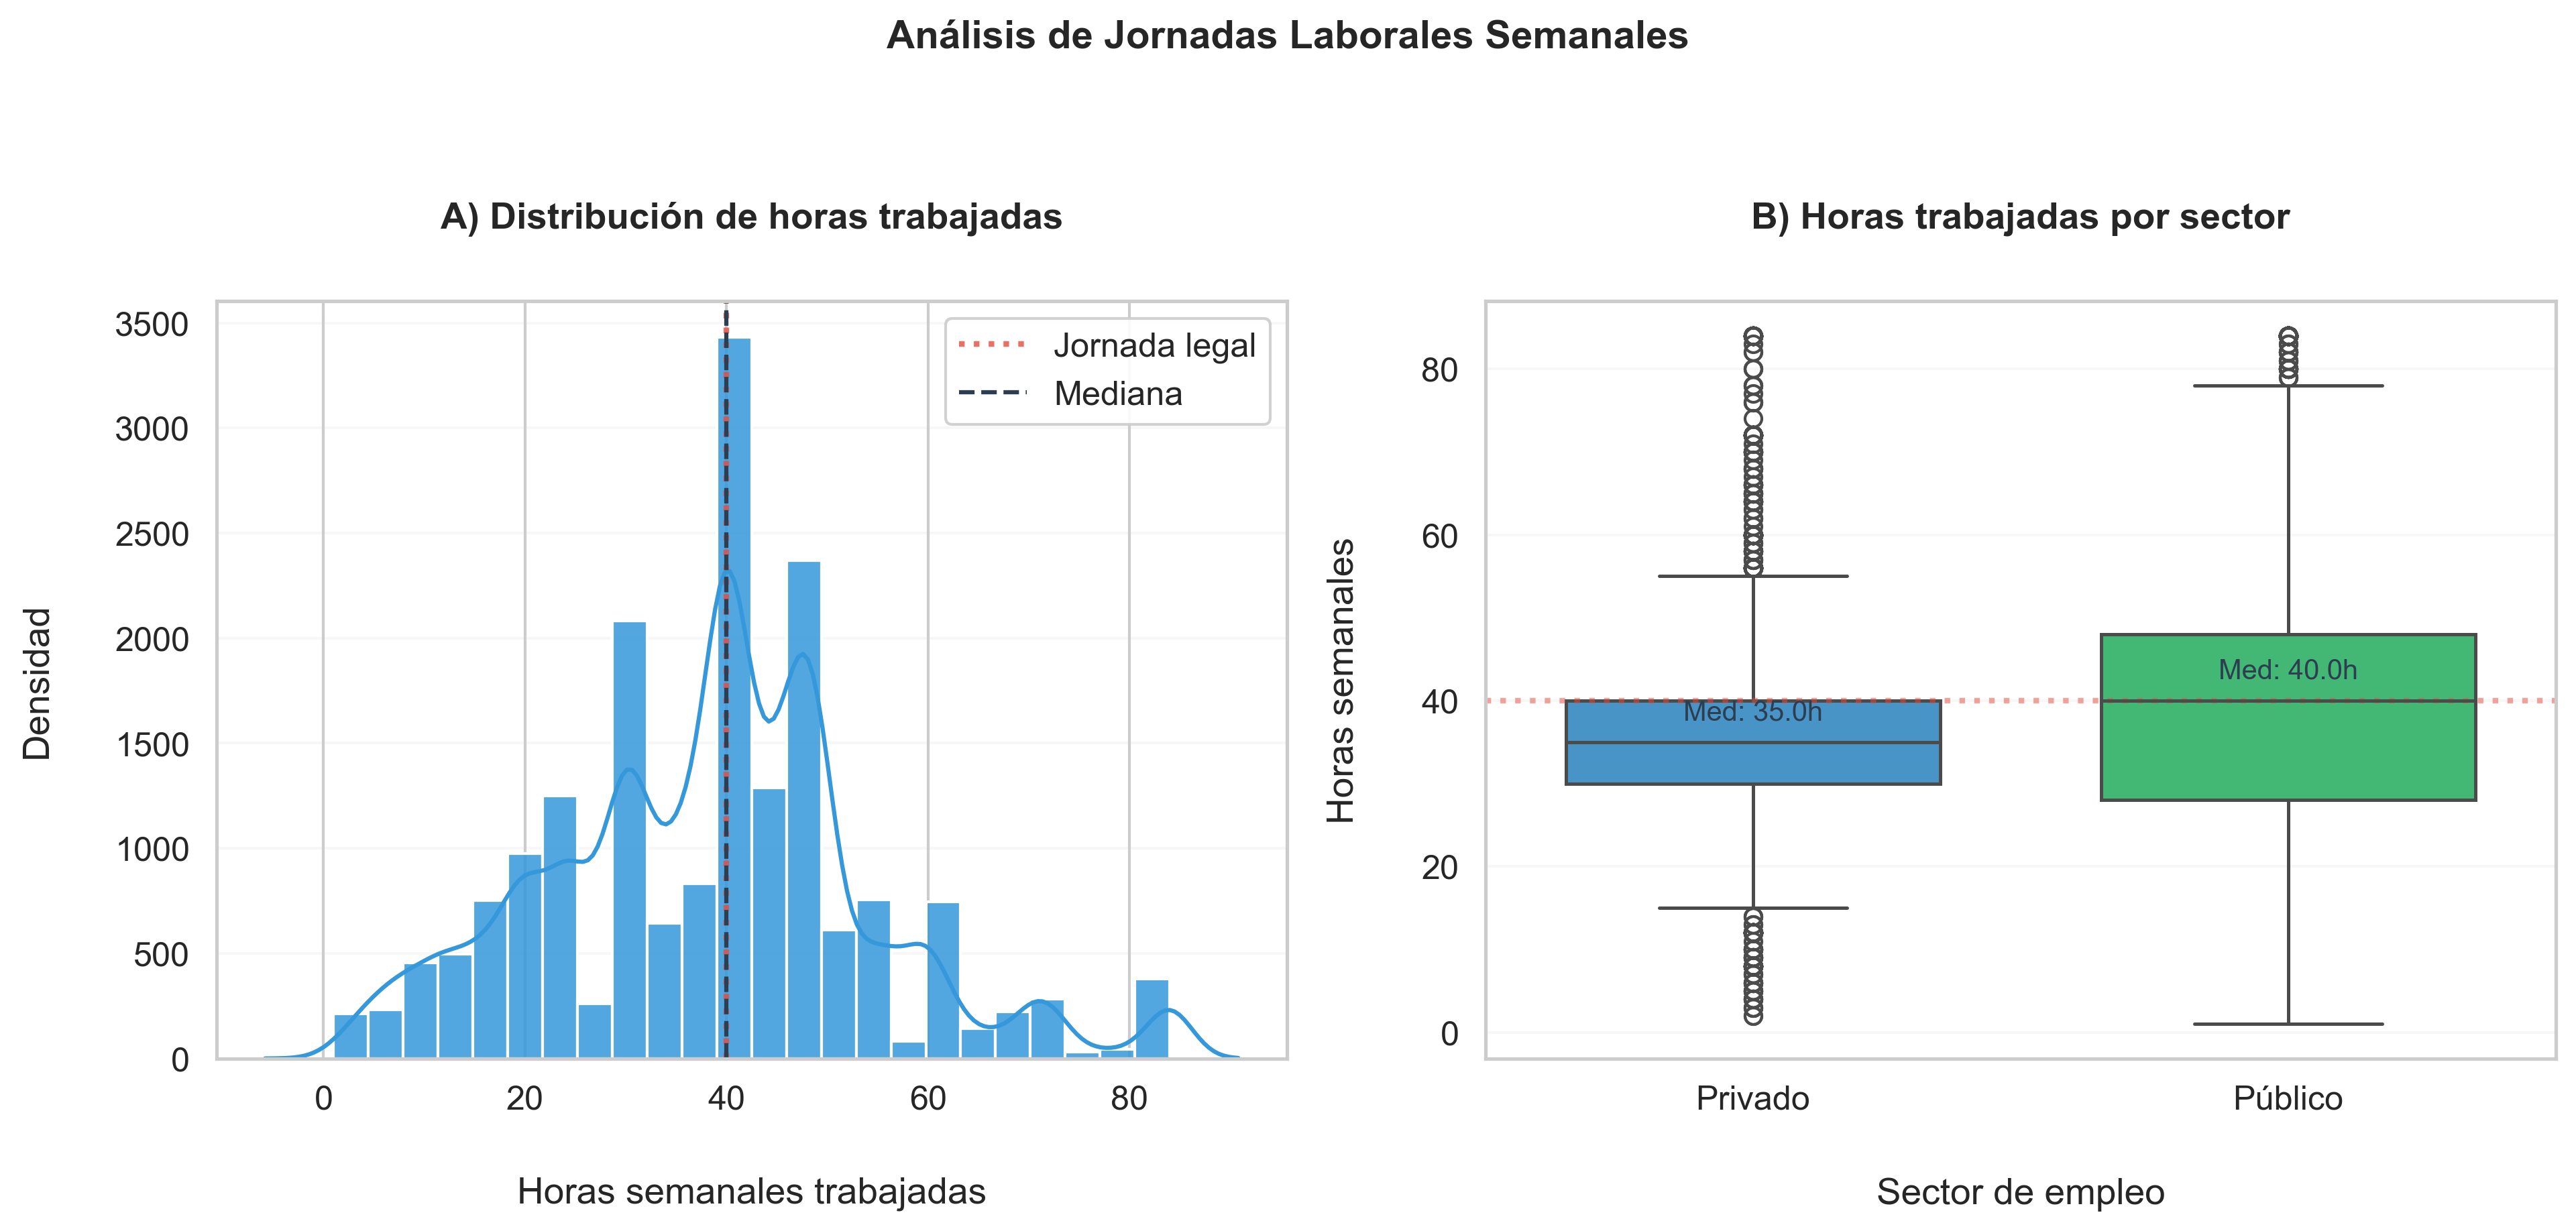

In [54]:
# Punto 4

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración profesional
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'

try:
    # Creamos variable de horas trabajadas 
    df['horastrab'] = (df['PP3E_TOT'].fillna(0) + df['PP3F_TOT'].fillna(0)).clip(upper=84)
    
    # Filtramos solo ocupados con horas positivas
    df_horas = df[(df['estado_laboral'] == 'Ocupado') & (df['horastrab'] > 0)].copy()
    
    # Estadísticas descriptivas 
    stats_horas = df_horas['horastrab'].describe(percentiles=[.1, .25, .5, .75, .9]).round(1)
    stats_horas.to_excel('Tabla4_EstadisticasHoras.xlsx')
    
    # Figura: Gráficos profesionales
    plt.figure(figsize=(13, 6))
    
    # Panel 1: Histograma con distribución
    plt.subplot(1, 2, 1)
    ax1 = sns.histplot(data=df_horas, x='horastrab', bins=24, 
                      color='#3498db', edgecolor='white', alpha=0.85,
                      kde=True, kde_kws={'cut': 3})
    
    plt.title('A) Distribución de horas trabajadas\n', fontweight='semibold', pad=12)
    plt.xlabel('\nHoras semanales trabajadas', labelpad=8)
    plt.ylabel('Densidad\n', labelpad=8)
    plt.axvline(40, color='#e74c3c', linestyle=':', linewidth=2, alpha=0.8, label='Jornada legal')
    plt.axvline(stats_horas['50%'], color='#2c3e50', linestyle='--', label='Mediana')
    plt.legend(frameon=True, framealpha=0.9)
    plt.grid(axis='y', alpha=0.15)
    
    # Panel 2: Comparación por sector 
    plt.subplot(1, 2, 2)
    
    # Mapeo de categorías 
    sector_map = {
        1: 'Privado', 
        2: 'Público',
       
    }
    df_horas['sector'] = df_horas['PP04A'].map(sector_map).fillna('Otros')

    ax2 = sns.boxplot(
        data=df_horas[df_horas['sector'].isin(['Privado', 'Público'])],
        x='sector',
        y='horastrab',
        hue='sector', 
        order=['Privado', 'Público'],
        palette={'Privado':'#3498db', 'Público':'#2ecc71'},
        width=0.7,
        linewidth=1.2,
        dodge=False,  
        legend=False   
    )
    
    plt.title('B) Horas trabajadas por sector\n', fontweight='semibold', pad=12)
    plt.xlabel('\nSector de empleo', labelpad=8)
    plt.ylabel('Horas semanales\n', labelpad=8)
    plt.axhline(40, color='#e74c3c', linestyle=':', linewidth=2, alpha=0.5)
    plt.grid(axis='y', alpha=0.15)
    
    # Añadimos anotaciones con valores clave
    for i, sector in enumerate(['Privado', 'Público']):
        mediana = df_horas[df_horas['sector']==sector]['horastrab'].median()
        plt.text(i, mediana+2, f'Med: {mediana}h', 
                ha='center', va='bottom', fontsize=10, color='#2c3e50')
    
    plt.suptitle('Análisis de Jornadas Laborales Semanales\n', 
                fontweight='bold', y=1.02, fontsize=14)
    plt.tight_layout()
    plt.savefig('Figura4_HorasTrabajadas.png', 
               bbox_inches='tight', dpi=300, facecolor='white')

except Exception as e:
    print(f"Error en el análisis: {str(e)}")
    if 'plt' in locals() and plt.get_fignums():
        plt.savefig('Error_AnalisisHoras.png', bbox_inches='tight', dpi=300)

In [78]:
# Punto 5

import pandas as pd

def cargar_datos():
   
    # Cargamos datos
    df_2004 = pd.read_stata('usu_individual_T104.dta')
    df_2024 = pd.read_excel('usu_individual_T124.xlsx')
    
    # Normalizamos columnas
    df_2004.columns = df_2004.columns.str.lower().str.replace(' ', '')
    df_2024.columns = df_2024.columns.str.lower().str.replace(' ', '')
    
    return df_2004, df_2024

def generar_tabla_verificada(df_2004, df_2024):
    """Genera tabla con verificación de consistencia"""
    # Filtramos Neuquén-Plottier 
    neuq_2004 = df_2004[df_2004['aglomerado'] == 17].copy()
    neuq_2024 = df_2024[df_2024['aglomerado'] == 17].copy()
    
    # Calculamos componentes
    def calcular_metricas(df):
        return {
            'obs': len(df),
            'nas_estado': df['estado'].isna().sum(),
            'ocupados': (df['estado'] == 1).sum(),
            'desocupados': (df['estado'] == 2).sum(),
            'inactivos': len(df) - ((df['estado'] == 1).sum() + (df['estado'] == 2).sum() + df['estado'].isna().sum()),
            'vars': len(df.columns)
        }
    
    m2004 = calcular_metricas(neuq_2004)
    m2024 = calcular_metricas(neuq_2024)
    
    # Variables homogeneizadas 
    vars_compatibles = [
        col for col in neuq_2004.columns 
        if col in neuq_2024.columns 
        and neuq_2004[col].dtype == neuq_2024[col].dtype
    ]
    
    # Creamos tabla
    tabla = pd.DataFrame({
        '2004': [
            m2004['obs'],
            m2004['nas_estado'],
            m2004['ocupados'],
            m2004['desocupados'],
            m2004['inactivos'],
            len(vars_compatibles)
        ],
        '2024': [
            m2024['obs'],
            m2024['nas_estado'],
            m2024['ocupados'],
            m2024['desocupados'],
            m2024['inactivos'],
            len(vars_compatibles)
        ],
        'Total': [
            m2004['obs'] + m2024['obs'],
            m2004['nas_estado'] + m2024['nas_estado'],
            m2004['ocupados'] + m2024['ocupados'],
            m2004['desocupados'] + m2024['desocupados'],
            m2004['inactivos'] + m2024['inactivos'],
            len(vars_compatibles)
        ]
    }, index=[
        'Cantidad observaciones',
        'Observaciones con NA en Estado',
        'Ocupados (Estado=1)',
        'Desocupados (Estado=2)',
        'Inactivos (otros)',
        'Variables homogeneizadas'
    ])
    
    return tabla, vars_compatibles


try:
    
    df_2004, df_2024 = cargar_datos()
    
   
    print(f"Registros 2004: {len(df_2004[df_2004['aglomerado'] == 17])}")
    print(f"Registros 2024: {len(df_2024[df_2024['aglomerado'] == 17])}")
    
    tabla, vars_homogeneizadas = generar_tabla_verificada(df_2004, df_2024)
    
    print("\nTABLA RESUMEN FINAL:")
    print(tabla)
    
    # Guardamos resultados
    tabla.to_excel('Tabla5_Resumen_Verificado.xlsx')
    with open('variables_homogeneizadas.txt', 'w') as f:
        f.write("\n".join(vars_homogeneizadas))
    
  
    
except Exception as e:
    print(f"\nERROR: {str(e)}")
    print("Verifique:")
    print("1. Archivos en el directorio correcto")
    print("2. Columnas 'aglomerado' y 'estado' presentes")
    print("3. Datos para aglomerado=17")

Registros 2004: 0
Registros 2024: 1160

TABLA RESUMEN FINAL:
                                2004  2024  Total
Cantidad observaciones             0  1160   1160
Observaciones con NA en Estado     0     0      0
Ocupados (Estado=1)                0   559    559
Desocupados (Estado=2)             0    40     40
Inactivos (otros)                  0   561    561
Variables homogeneizadas          31    31     31


In [5]:
import pandas as pd

# Cargar el archivo Excel en el DataFrame df
df = pd.read_excel('usu_individual_T124.xlsx')

                     CH06     edad2  educ  salario_semanal  horastrab
CH06             1.000000  0.964364   NaN         0.076703   0.110127
edad2            0.964364  1.000000   NaN        -0.019759  -0.035274
educ                  NaN       NaN   NaN              NaN        NaN
salario_semanal  0.076703 -0.019759   NaN         1.000000   0.524641
horastrab        0.110127 -0.035274   NaN         0.524641   1.000000


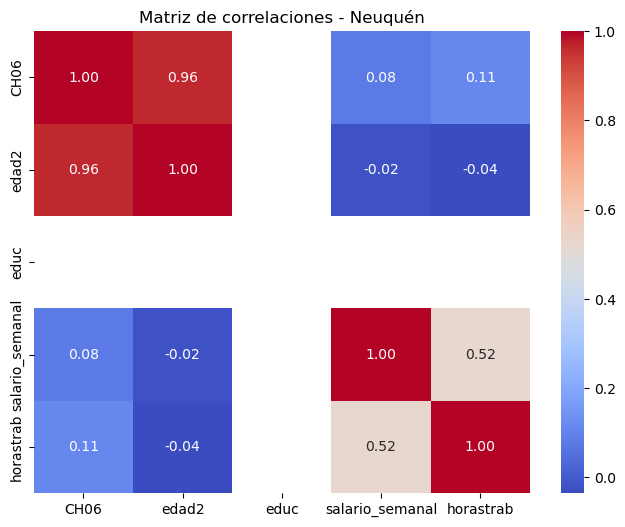

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el archivo Excel
df = pd.read_excel('usu_individual_T124.xlsx')

# 2. Crear las variables necesarias
df['edad2'] = df['CH06'] ** 2

# Crea la variable educ (ajusta la función según tu codificación)
def calcular_educ(row):
    if row['CH12'] == 'Secundario' and row['CH13'] == 'Sí':
        return 12
    elif row['CH12'] == 'Primario' and row['CH13'] == 'Sí':
        return 6
    elif row['CH12'] == 'Universitario' and row['CH13'] == 'Sí':
        return 17
    else:
        return np.nan

df['educ'] = df.apply(calcular_educ, axis=1)

# Crea salario_semanal (ajusta el factor según tu consigna)
def convertir_a_pesos_2024(valor, año_original):
    factores = {2004: 12.5, 2024: 1.0}
    return valor * factores.get(int(año_original), 1.0)

df['salario_semanal'] = df.apply(
    lambda x: convertir_a_pesos_2024(x['P21'], x['ANO4']) / 40 if pd.notna(x['P21']) else np.nan,
    axis=1
)

# Crea horas trabajadas
df['horastrab'] = (df['PP3E_TOT'].fillna(0) + df['PP3F_TOT'].fillna(0)).clip(upper=84)

# 3. Filtrar Neuquén
df_neuquen = df[df['AGLOMERADO'] == 17]

# 4. Matriz de correlaciones
variables = ['CH06', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_region = df_neuquen[variables]
matriz_corr = df_region.corr()
print(matriz_corr)

plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones - Neuquén')
plt.show()

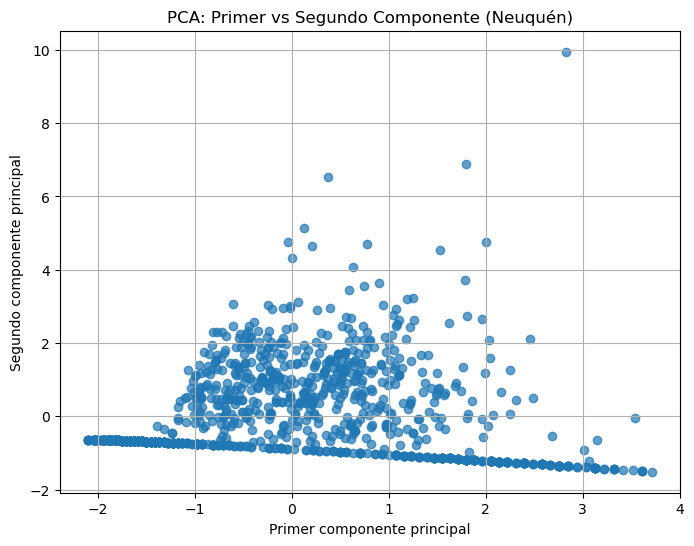


Varianza explicada por cada componente:
[0.49356099 0.38114722]

Coeficientes de las variables en cada componente:
                      PC1       PC2
CH06             0.705892 -0.047838
edad2            0.692775 -0.161080
salario_semanal  0.099981  0.696623
horastrab        0.108550  0.697482


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


variables = ['CH06', 'edad2', 'salario_semanal', 'horastrab']
df_pca = df_neuquen[variables].copy()


df_pca = df_pca.dropna()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA: Primer vs Segundo Componente (Neuquén)')
plt.grid(True)
plt.show()


print("\nVarianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


print("\nCoeficientes de las variables en cada componente:")
coef = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=variables
)
print(coef)

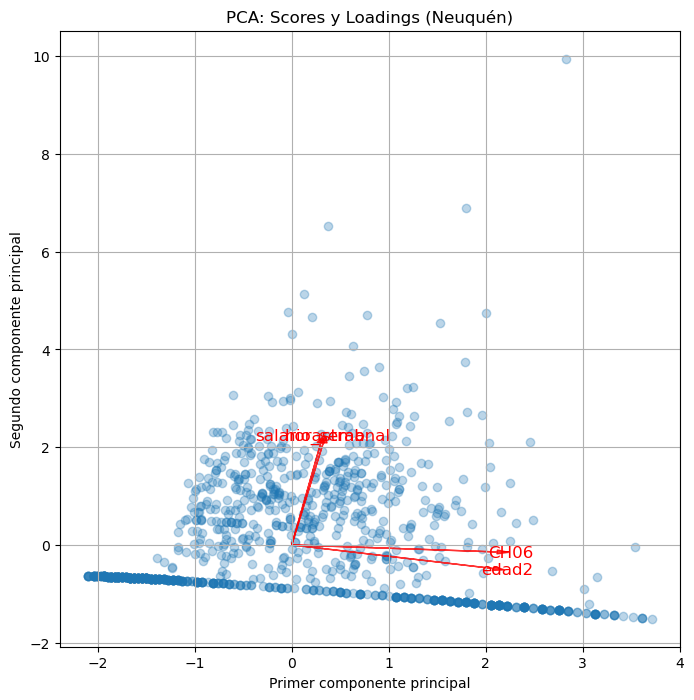

Ponderadores (loadings) de cada variable en los dos primeros componentes:
                      PC1       PC2
CH06             0.705892 -0.047838
edad2            0.692775 -0.161080
salario_semanal  0.099981  0.696623
horastrab        0.108550  0.697482


In [14]:
# Gráfico de los scores (personas)
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA: Scores y Loadings (Neuquén)')
plt.grid(True)

# Graficar los loadings (flechas)
loadings = pca.components_.T
for i, var in enumerate(variables):
    plt.arrow(0, 0, loadings[i,0]*3, loadings[i,1]*3, 
              color='red', alpha=0.8, head_width=0.08)
    plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, var, color='red', ha='center', va='center', fontsize=12)

plt.show()

# Mostrar los valores numéricos de los loadings
print("Ponderadores (loadings) de cada variable en los dos primeros componentes:")
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=variables)
print(loadings_df)

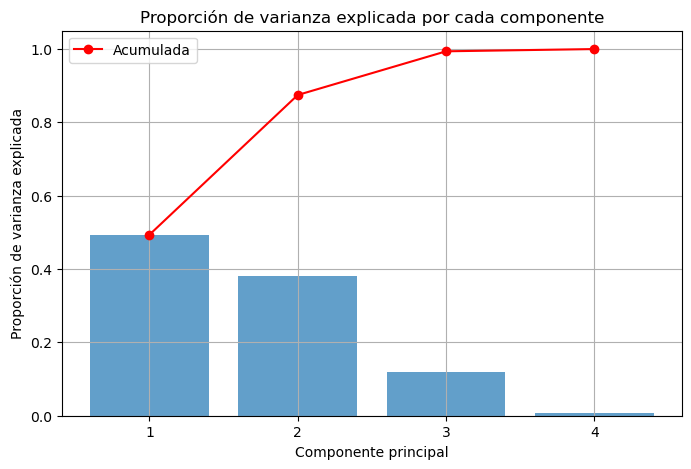

Proporción de varianza explicada por cada componente:
Componente 1: 49.36%
Componente 2: 38.11%
Componente 3: 11.92%
Componente 4: 0.61%


In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca_full = PCA()
pca_full.fit(X_scaled)


varianza_explicada = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.bar(range(1, len(varianza_explicada)+1), varianza_explicada, alpha=0.7)
plt.plot(range(1, len(varianza_explicada)+1), np.cumsum(varianza_explicada), marker='o', color='red', label='Acumulada')
plt.xlabel('Componente principal')
plt.ylabel('Proporción de varianza explicada')
plt.title('Proporción de varianza explicada por cada componente')
plt.xticks(range(1, len(varianza_explicada)+1))
plt.legend()
plt.grid(True)
plt.show()

# Imprime los valores numéricos
print("Proporción de varianza explicada por cada componente:")
for i, var in enumerate(varianza_explicada, 1):
    print(f"Componente {i}: {var:.2%}")

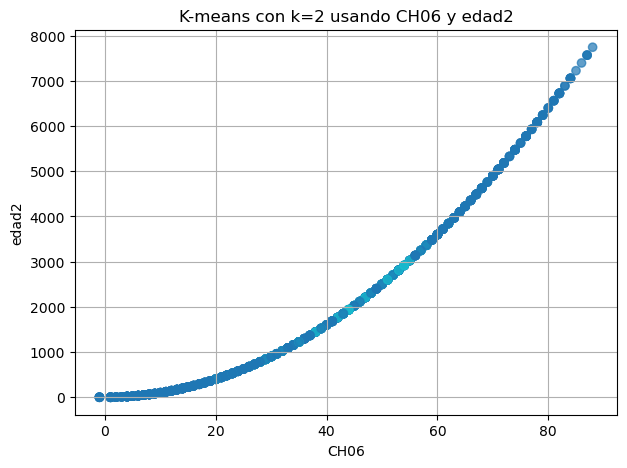

Centroides para k=2:
 [[3.71341589e+01 1.92518369e+03 1.27887748e+03 1.25314757e+01]
 [4.03664921e+01 1.75807330e+03 2.00244764e+04 4.30052356e+01]]


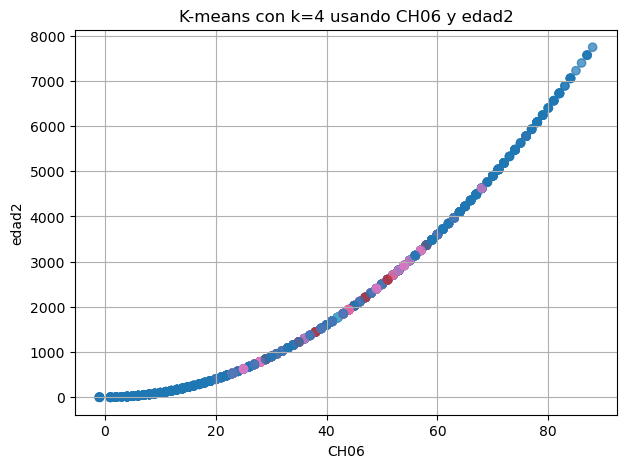

Centroides para k=4:
 [[3.66958042e+01 1.94373077e+03 3.70384353e+02 9.69930070e+00]
 [4.11647059e+01 1.80852941e+03 2.40717647e+04 4.38352941e+01]
 [3.99620853e+01 1.73578199e+03 1.08057701e+04 3.78151659e+01]
 [4.61666667e+01 2.26650000e+03 7.00000000e+04 5.50000000e+01]]


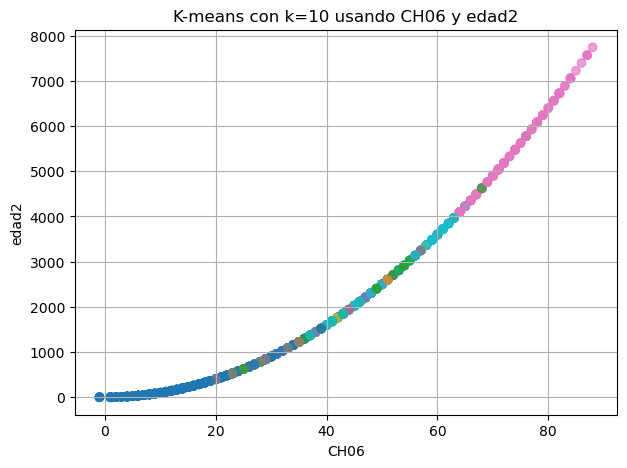

Centroides para k=10:
 [[1.67288889e+01 3.77920000e+02 5.60811111e+01 6.06222222e+00]
 [4.18095238e+01 1.84480952e+03 2.47583333e+04 4.10238095e+01]
 [3.95871560e+01 1.72222936e+03 1.09784404e+04 3.51559633e+01]
 [6.00000000e+01 3.60000000e+03 1.25000000e+05 4.00000000e+01]
 [4.00259740e+01 1.72896104e+03 1.67889610e+04 4.49220779e+01]
 [4.73333333e+01 2.38200000e+03 6.50000000e+04 6.20000000e+01]
 [7.28197674e+01 5.34026163e+03 1.85928779e+01 2.01162791e+00]
 [3.92666667e+01 1.68475238e+03 5.95940833e+03 3.47714286e+01]
 [4.06666667e+01 1.75850000e+03 4.04166667e+04 5.45833333e+01]
 [5.11851852e+01 2.67525926e+03 3.99391138e+02 1.97724868e+01]]


KeyError: 'educ'

<Figure size 700x500 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


variables_cluster = ['CH06', 'edad2', 'salario_semanal', 'horastrab']
X_cluster = df_neuquen[variables_cluster].dropna()


ks = [2, 4, 10]
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    clusters = kmeans.fit_predict(X_cluster)
    plt.figure(figsize=(7,5))
    plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=clusters, cmap='tab10', alpha=0.7)
    plt.xlabel(variables_cluster[0])
    plt.ylabel(variables_cluster[1])
    plt.title(f'K-means con k={k} usando {variables_cluster[0]} y {variables_cluster[1]}')
    plt.grid(True)
    plt.show()
    print(f"Centroides para k={k}:\n", kmeans.cluster_centers_)


df_k2 = df_neuquen[['CH06', 'edad2', 'ESTADO']].dropna()
kmeans2 = KMeans(n_clusters=2, n_init=20, random_state=42)
df_k2['cluster'] = kmeans2.fit_predict(df_k2[['CH06', 'edad2']])


colores = df_k2['ESTADO'].map({1: 'blue', 2: 'red'}) 

plt.figure(figsize=(7,5))
plt.scatter(df_k2['CH06'], df_k2['educ'], c=colores, alpha=0.7, label='Ocupación')
plt.xlabel('Edad')
plt.ylabel('Educación')
plt.title('K-means (k=2): Edad vs Educación, coloreado por ocupación')
plt.grid(True)
plt.show()



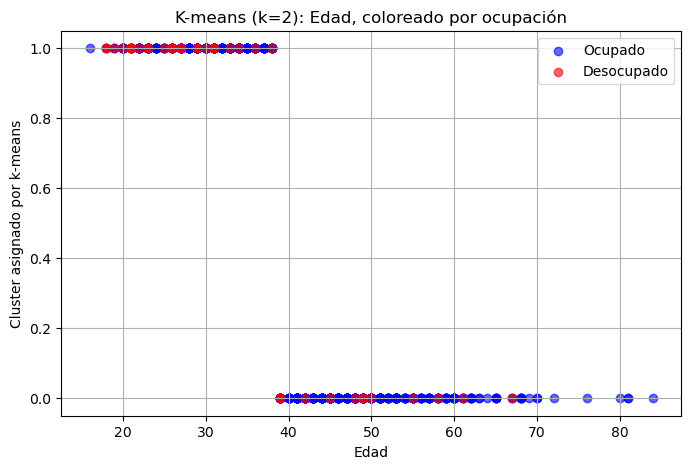

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecciona las variables necesarias (sin 'educ')
df_k2 = df_neuquen[['CH06', 'ESTADO']].dropna()

# Aplica k-means con k=2 usando la edad como predictor
kmeans2 = KMeans(n_clusters=2, n_init=20, random_state=42)
df_k2['cluster'] = kmeans2.fit_predict(df_k2[['CH06']])

# Asigna color según ocupación (ajusta el mapeo si tu codificación es diferente)
# Por ejemplo, 1=ocupado, 2=desocupado
colores = df_k2['ESTADO'].map({1: 'blue', 2: 'red'})

# Gráfico: eje X = edad, eje Y = cluster asignado, color = ocupación
plt.figure(figsize=(8,5))
for estado, color, label in zip([1,2], ['blue', 'red'], ['Ocupado', 'Desocupado']):
    subset = df_k2[df_k2['ESTADO'] == estado]
    plt.scatter(subset['CH06'], subset['cluster'], c=color, label=label, alpha=0.6)

plt.xlabel('Edad')
plt.ylabel('Cluster asignado por k-means')
plt.title('K-means (k=2): Edad, coloreado por ocupación')
plt.legend()
plt.grid(True)
plt.show()



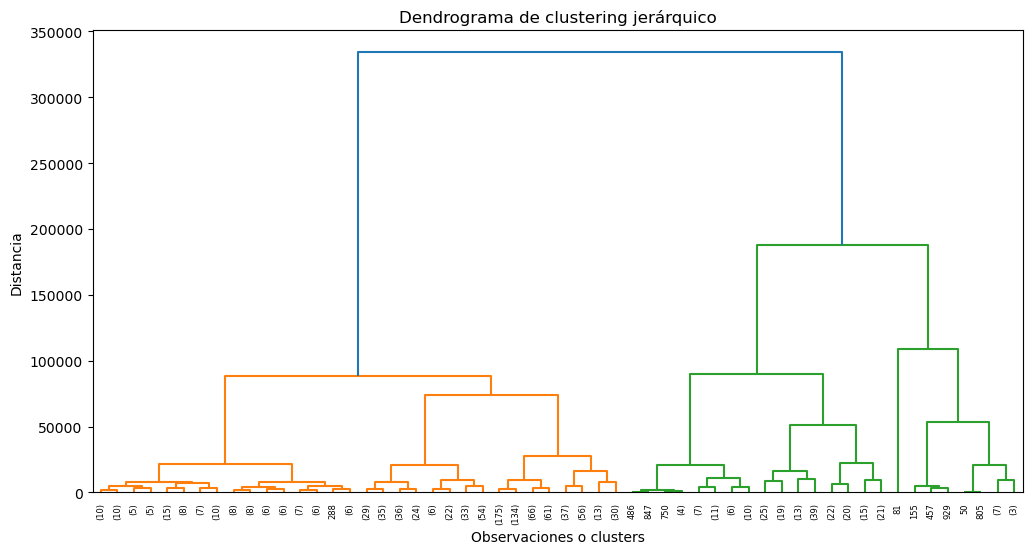

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


variables_cluster = ['CH06', 'edad2', 'salario_semanal', 'horastrab']
X_hier = df_neuquen[variables_cluster].dropna()


Z = linkage(X_hier, method='ward')


plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('Observaciones o clusters')
plt.ylabel('Distancia')
plt.show()




In [ ]:
# TP 4 Punto 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Variables esenciales
respondieron['mujer'] = (respondieron['CH04'] == 2).astype(int)
respondieron['desocupado'] = (respondieron['ESTADO'] == 2).astype(int)
respondieron['edad2'] = respondieron['CH06']**2

# Educación
respondieron['educ'] = (respondieron['CH06'] - 6).clip(lower=0, upper=17)

# Crear salario semanal
def ajustar_salario(row):
    try:
        if pd.isna(row['P21']):
            return np.nan
        salario = float(row['P21'])  # Asegurar que es numérico
        factor = 12.5 if row['ANIO'] == 2004 else 1.0
        return (salario * factor) / 4  # Convertir a semanal
    except:
        return np.nan

respondieron['salario_semanal'] = respondieron.apply(ajustar_salario, axis=1)

# seleccionar variables para el modelo
vars_modelo = ['CH06', 'edad2', 'educ', 'mujer', 'salario_semanal', 'desocupado']
df = respondieron[vars_modelo].dropna()

# Dividir en conjuntos de entrenamiento y prueba
X = df[['CH06', 'edad2', 'educ', 'mujer']]  # Variables predictoras
y = df['desocupado']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=444, 
    stratify=y
)

# Análisis descriptivo
print("\nTamaño de los conjuntos:")
print(f"Entrenamiento: {X_train.shape[0]} observaciones")
print(f"Prueba: {X_test.shape[0]} observaciones")

# Gráfico de distribución de edad 
plt.figure(figsize=(12, 5))
plt.hist(X_train['CH06'], bins=20, alpha=0.5, label='Train', density=True)
plt.hist(X_test['CH06'], bins=20, alpha=0.5, label='Test', density=True)
plt.title('Distribución de Edad: Train vs Test')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.savefig('distribucion_edad_train_test.png', dpi=300)
plt.show()

# Tabla de diferencias de medias
tabla_medias = pd.DataFrame({
    'Train': X_train.mean(),
    'Test': X_test.mean(),
    'Diferencia': (X_train.mean() - X_test.mean()).abs()
}).round(2)

print("\nTabla 1. Diferencia de medias entre train y test")
print(tabla_medias)

NameError: name 'respondieron' is not defined

In [116]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tabulate import tabulate

# 1. Cargar datos
df = pd.read_csv("respondieron_neuquen.csv")

# 2. Crear variables necesarias
df['Mujer'] = (df['CH04'] == 2).astype(int)  # Dummy mujer=1 si CH04==2
df['edad'] = df['CH06']  # CH06 = edad 
df['edad2'] = df['edad']**2
df['educ'] = df['CH12']**2
df['categoria_ocupacion'] = df['CAT_OCUP'].astype('category')  # Variable 1
df['PEA_binaria'] = (df['PEA'] == 1).astype(int)  # Variable 2 

# Modelos 
modelos = {
    "Modelo 1": "P21 ~ edad",
    "Modelo 2": "P21 ~ edad + edad2",
    "Modelo 3": "P21 ~ edad + edad2 + educ",  
    "Modelo 4": "P21 ~ edad + edad2 + educ + Mujer",
    "Modelo 5": "P21 ~ edad + edad2 + educ + Mujer + C(categoria_ocupacion) + PEA_binaria"
}

# Procesar modelos y construir tabla
tabla = []
for nombre, formula in modelos.items():
    try:
        model = ols(formula, data=df.dropna()).fit()
        for var in model.params.index:
            # Formatear coeficiente y error estándar
            coef = round(model.params[var], 3)
            se = round(model.bse[var], 2)
            pval = model.pvalues[var]
           
            tabla.append({
                'Variable': var.replace('C(categoria_ocupacion)[T.', 'Categoría ').replace(']', ''),
                'Modelo': nombre,
                'Valor': f"{coef}{sig} ({se})"
            })
        # Añadir N y R²
        tabla.append({
            'Variable': 'N',
            'Modelo': nombre,
            'Valor': str(int(model.nobs))
        })
        tabla.append({
            'Variable': 'R²',
            'Modelo': nombre,
            'Valor': f"{round(model.rsquared, 3)}"
        })
    except Exception as e:
        print(f"Error en {nombre}: {e}")

# Tabla
df_tabla = pd.DataFrame(tabla)
tabla_final = df_tabla.pivot(index='Variable', columns='Modelo', values='Valor').fillna('-')

# Ordenar filas para mejor presentación
orden_variables = [
    'edad', 'edad2', 'educ', 'Mujer',
    *[v for v in tabla_final.index if 'Categoría' in v],
    'PEA_binaria', 'N', 'R²'
]
tabla_final = tabla_final.reindex([v for v in orden_variables if v in tabla_final.index])

# Imprimir tabla final
print("TABLA DE RESULTADOS (Desvío estándar)")
print(tabulate(tabla_final, headers='keys', tablefmt='simple'))


TABLA DE RESULTADOS (Desvío estándar)
Variable       Modelo 1          Modelo 2           Modelo 3           Modelo 4              Modelo 5
-------------  ----------------  -----------------  -----------------  --------------------  ---------------------
edad           1268.41 (250.12)  7883.223 (881.43)  6719.924 (985.49)  6528.287 (977.15)     385.551 (1225.18)
edad2          -                 -88.527 (11.33)    -74.275 (12.55)    -71.328 (12.45)       -0.516 (14.95)
educ           -                 -                  933.653 (356.73)   1054.547 (354.22)     1059.262 (345.57)
Mujer          -                 -                  -                  -51424.952 (9951.28)  -38565.303 (9951.15)
Categoría 1.0  -                 -                  -                  -                     39301.803 (72650.62)
Categoría 2.0  -                 -                  -                  -                     12240.565 (57668.92)
Categoría 3.0  -                 -                  -                  - 

In [150]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.formula.api import ols

# Cargar datos y preparar variables (como en el código anterior)
df = pd.read_csv("respondieron_neuquen.csv")
df['Mujer'] = (df['CH04'] == 2).astype(int)
df['edad'] = df['CH06']
df['edad2'] = df['edad']**2
df['educ'] = df['CH12']**2
df['categoria_ocupacion'] = df['CAT_OCUP'].astype('category')
df['PEA_binaria'] = (df['PEA'] == 1).astype(int)

# Crear salario semanal ajustado
def ajustar_salario(row):
    try:
        if pd.isna(row['P21']):
            return np.nan
        salario = float(row['P21'])
        factor = 12.5 if row['ANIO'] == 2004 else 1.0
        return (salario * factor) / 4  # Convertir a semanal
    except:
        return np.nan

df['salario_semanal'] = df.apply(ajustar_salario, axis=1)
df = df.dropna(subset=['salario_semanal'])

#Limpiamos outliers

df_clean = df[(df['salario_semanal'] > 0) & 
              (df['salario_semanal'] < df['salario_semanal'].quantile(0.99))].copy()

# Dividir en train y test (70% train, 30% test, random_state=444)
train, test = train_test_split(df, test_size=0.3, random_state=444)

# Definir los modelos como en el código anterior
modelos = {
    "Modelo 1": "salario_semanal ~ edad",
    "Modelo 2": "salario_semanal ~ edad + edad2",
    "Modelo 3": "salario_semanal ~ edad + edad2 + educ",
    "Modelo 4": "salario_semanal ~ edad + edad2 + educ + Mujer",
    "Modelo 5": "salario_semanal ~ edad + edad2 + educ + Mujer + C(categoria_ocupacion) + PEA_binaria"
}

# Entrenar modelos y predecir en test
resultados = []
for nombre, formula in modelos.items():
    # Entrenar modelo
    model = ols(formula, data=train).fit()
    
    # Predecir en test
    y_pred = model.predict(test)
    y_true = test['salario_semanal']
    
    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    resultados.append({
        'Modelo': nombre,
        'MSE test': round(mse, 2),
        'RMSE test': round(rmse, 2),
        'MAE test': round(mae, 2)
    })

# Crear tabla de resultados
tabla_resultados = pd.DataFrame(resultados)
print("Tabla 3. Performance por regresión lineal de la predicción de salarios usando la base de testeo")
print(tabla_resultados.to_string(index=False))

Tabla 3. Performance por regresión lineal de la predicción de salarios usando la base de testeo
  Modelo     MSE test  RMSE test  MAE test
Modelo 1 4.754718e+09   68954.47  41691.32
Modelo 2 4.438389e+09   66621.23  40643.88
Modelo 3 4.265549e+09   65311.17  40318.99
Modelo 4 4.273571e+09   65372.56  41050.54
Modelo 5 3.710052e+09   60910.20  35140.12


Conteo de desocupado (0=otro, 1=desocupado):
desocupado
0    1863
1      76
Name: count, dtype: int64

---- Regresión Logística ----
Matriz de confusión (p>0.5):
[[559   0]
 [ 23   0]]
Accuracy: 0.960
AUC: 0.858

---- KNN (K=5) ----
Matriz de confusión (p>0.5):
[[553   6]
 [ 22   1]]
Accuracy: 0.952
AUC: 0.762


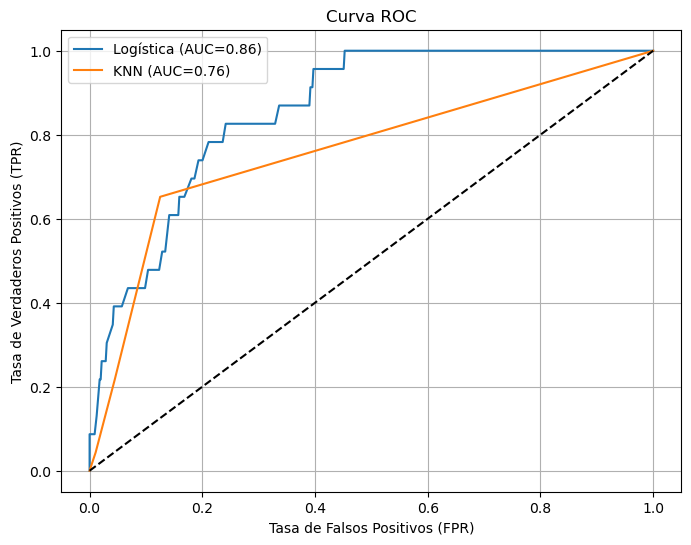

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score, accuracy_score
)
import matplotlib.pyplot as plt


df = pd.read_csv("respondieron_neuquen.csv")


df['desocupado'] = (df['ESTADO'] == 2).astype(int)


print("Conteo de desocupado (0=otro, 1=desocupado):")
print(df['desocupado'].value_counts())


features = ['CH04', 'CH06', 'PEA']
X = df[features].copy()
X = pd.get_dummies(X, columns=['CH04', 'PEA'], drop_first=True)
y = df['desocupado']

# 5. Dividir en train/test, usando stratify para asegurar ambos grupos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444, stratify=y
)

# 6. Regresión logística
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_proba_logit = logit.predict_proba(X_test)[:, 1]
y_pred_logit = (y_proba_logit > 0.5).astype(int)

# 7. KNN (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_proba_knn = knn.predict_proba(X_test)[:, 1]
y_pred_knn = (y_proba_knn > 0.5).astype(int)

# 8. Función para imprimir métricas y graficar ROC
def performance(y_test, y_pred, y_proba, nombre):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    auc_ = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    print(f"\n---- {nombre} ----")
    print("Matriz de confusión (p>0.5):")
    print(cm)
    print(f"Accuracy: {acc:.3f}")
    print(f"AUC: {auc_:.3f}")
    return fpr, tpr, auc_

# 9. Reporte Logística
fpr_logit, tpr_logit, auc_logit = performance(y_test, y_pred_logit, y_proba_logit, "Regresión Logística")

# 10. Reporte KNN
fpr_knn, tpr_knn, auc_knn = performance(y_test, y_pred_knn, y_proba_knn, "KNN (K=5)")

# 11. Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logit, tpr_logit, label=f'Logística (AUC={auc_logit:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC={auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd

archivo_origen = "c:\\Users\\ramas\\Desktop\\NOTEBOOK\\usu_individual_T124.xlsx"
archivo_destino = "c:\\Users\\ramas\\Desktop\\NOTEBOOK\\norespondieron.csv"

try:
  
    df = pd.read_excel(archivo_origen)
    
  
    df_filtrado = df[df['ESTADO'] == 0]
    
  
    df_filtrado.to_csv(archivo_destino, index=False)
    
    print(f"Archivo guardado correctamente en {archivo_destino}, con {len(df_filtrado)} filas filtradas.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {archivo_origen}")
except KeyError:
    print("Error: La columna 'ESTADO' no existe en el archivo.")
except Exception as e:
    print(f"Error inesperado: {e}")


Archivo guardado correctamente en c:\Users\ramas\Desktop\NOTEBOOK\norespondieron.csv, con 81 filas filtradas.


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

archivo_respondieron = "c:\\Users\\ramas\\Desktop\\NOTEBOOK\\respondieron_neuquen.csv"
archivo_norespondieron = "c:\\Users\\ramas\\Desktop\\NOTEBOOK\\norespondieron.csv"

respondieron = pd.read_csv(archivo_respondieron)
norespondieron = pd.read_csv(archivo_norespondieron)


respondieron['mujer'] = (respondieron['CH04'] == 2).astype(int)
respondieron['desocupado'] = (respondieron['ESTADO'] == 2).astype(int)
respondieron['edad2'] = respondieron['CH06']**2
respondieron['educ'] = (respondieron['CH06'] - 6).clip(lower=0, upper=17)

# Base 'norespondieron' (aplicar mismas transformaciones)
norespondieron['mujer'] = (norespondieron['CH04'] == 2).astype(int)
norespondieron['edad2'] = norespondieron['CH06']**2
norespondieron['educ'] = (norespondieron['CH06'] - 6).clip(lower=0, upper=17)

# Variables predictoras
predictoras = ['CH06', 'edad2', 'educ', 'mujer']
X_train = respondieron[predictoras]
y_train = respondieron['desocupado']
X_norespondieron = norespondieron[predictoras]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_norespondieron_scaled = scaler.transform(X_norespondieron)


logreg = LogisticRegression(max_iter=1000, random_state=444)
logreg.fit(X_train_scaled, y_train)


norespondieron['desocupado_prob'] = logreg.predict_proba(X_norespondieron_scaled)[:, 1]


umbral = 0.05
norespondieron['desocupado_pred'] = (norespondieron['desocupado_prob'] > umbral).astype(int)


total_norespondieron = len(norespondieron)
desocupados_predichos = norespondieron['desocupado_pred'].sum()
proporcion_desocupados = desocupados_predichos / total_norespondieron

# Mostrar resultados
print(f"Total de personas en 'norespondieron': {total_norespondieron}")
print(f"Total predichos como desocupados: {desocupados_predichos}")
print(f"Proporción predicha como desocupados: {proporcion_desocupados:.2%}")


archivo_predicciones = "c:\\Users\\ramas\\Desktop\\NOTEBOOK\\predicciones_norespondieron.csv"
norespondieron.to_csv(archivo_predicciones, index=False)



Total de personas en 'norespondieron': 81
Total predichos como desocupados: 49
Proporción predicha como desocupados: 60.49%
